# Project: Analysis of Tweet Data of WeRateDogs Twitter Account
By: __[Edun Joshua O.](https://www.linkedin.com/in/joshua-edun)__ <br>
For Udacity
## Table of Contents
<ul>
    <li><a href="#intro">Introduction</a></li>
    <li><a href="#sources">Data Sources</a></li>
    <li><a href="#gathering">Data Gathering</a></li>
    <li><a href="#assessing">Data Assessing</a></li>
        <li><a href="#assessingsum">Assessing Summary</a></li>
    <li><a href="#cleaning">Data Cleaning</a></li>
    <li><a href="#storing">Data Storing</a></li>
    <li><a href="#analysis">Data Analysis and Visualizations</a></li>
    <li><a href="#conclusion">Conclusion & Limitations</a></li>
    <li><a href="#report">Report</a></li>
</ul>

<a id='intro'></a>
# `Introduction`

The dataset comes from the tweet archive of Twitter user `@dog_rates`, also known as WeRateDogs.<br>

WeRateDogs is a Twitter account that rates people's dogs with a humourous comment about the dog. These ratings almost always have a denominator of 10 though the numerators can be adsurdly large. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

I got access to their tweet archive via Udacity. This archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017.

The Data Gathering process is supposed to comprise 3 methods of gathering data:
>**The WeRateDogs Twitter archive**<br>
To be downloaded manually

>**The tweet image predictions**<br>
image_predictions.tsv... To be downloaded programmatically 

>**Additional data from the Twitter API**<br>
Each tweet's retweet count and favorite ("like") is to be queried from Twitter's API into a file, tweet_json.txt.<br>
However, due to my Twitter Developer account not being verified in time, I proceeded to download this file manually as Udacity foresaw scenarios like this. 


In [1]:
# importing necessary libraries
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
import json
import re
import requests

<a id='gathering'></a>
# `Gather`

In [2]:
 # The WeRateDogs Twitter archive
df_tweets = pd.read_csv('twitter-archive-enhanced.csv')
df_tweets.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
# downloading programmatically
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

#get response
response = requests.get(url)


with open("image_predictions.tsv", mode = "wb") as file:
    file.write(response.content)

In [3]:
# reading in
df_neural = pd.read_csv("image_predictions.tsv", sep='\t')

df_neural.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_tweets.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json_a.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.errors.TweepyException as e:  # I changed this line to reflect Tweepy's changes
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


In [4]:
# API
# My developer account was not authenticated in time so I resorted to directly importing the JSON .txt file Udacity provided
json_tweets = []

#read the created file
with open('tweet_json.txt', 'r') as f:
    for line in f:
       # try: 
            tweet = json.loads(line)
            #append a dictionary to the created list            
            json_tweets.append({
                'tweet_id': tweet['id'],
                'retweet_count': tweet['retweet_count'],
                'favorite_count': tweet['favorite_count'],
                       
            })      
        


In [5]:
df_json = pd.DataFrame(json_tweets, columns = ['tweet_id', 'retweet_count', 'favorite_count'])
df_json.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8287,37931
1,892177421306343426,6119,32575
2,891815181378084864,4054,24530
3,891689557279858688,8424,41274
4,891327558926688256,9128,39464


--------

<a id='assessing'></a>
# `Assess`
### checking for data quality and structural issues in all three datasets
 - Visually
 - Programmatically
 
I will begin with df_tweets

**`1(a)`**<br>
### **Visual Assessment of `df_tweets`**

In [6]:
# Visual assessment
df_tweets.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [7]:
# Visual assessment
df_tweets.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [8]:
# Visual assessment
df_tweets.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2209,668623201287675904,NaN,NaN,2015-11-23 02:52:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jomathan. He is not thrilled about the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668623201...,10,10,Jomathan,None,None,None,None
1205,715928423106027520,NaN,NaN,2016-04-01 15:46:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bubbles. He's a Yorkshire Piccolope. 1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/715928423...,11,10,Bubbles,None,None,None,None
1580,687127927494963200,NaN,NaN,2016-01-13 04:23:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Gordon. He's an asshole. 9/10 would still...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/687127927...,9,10,Gordon,None,None,None,None
1066,740699697422163968,NaN,NaN,2016-06-09 00:19:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Chip. He only mowed half the yard. 8/1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/740699697...,8,10,Chip,None,None,None,None
2094,670778058496974848,NaN,NaN,2015-11-29 01:35:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""To bone or not to bone?""\n10/10 https://t.co/...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/670778058...,10,10,None,None,None,None,None


-------
**`1(b)`**<br>
### **Programmatic Assessment of `df_tweets`**

In [9]:
df_tweets.shape

(2356, 17)

In [10]:
df_tweets.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [11]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [12]:
# calculating the number of nulls per column
df_tweets.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [13]:
# calculating the percentage of nulls
nans = df_tweets.isna().mean() * 100
nans.sort_values(ascending=False)

in_reply_to_user_id           96.689304
in_reply_to_status_id         96.689304
retweeted_status_timestamp    92.317487
retweeted_status_id           92.317487
retweeted_status_user_id      92.317487
expanded_urls                  2.504244
rating_denominator             0.000000
pupper                         0.000000
floofer                        0.000000
doggo                          0.000000
name                           0.000000
tweet_id                       0.000000
rating_numerator               0.000000
text                           0.000000
source                         0.000000
timestamp                      0.000000
puppo                          0.000000
dtype: float64

In [14]:
# summary statistics
df_tweets.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [15]:
# summary stats for object dtype columns
df_tweets.describe(include='object')

,timestamp,source,text,retweeted_status_timestamp,expanded_urls,name,doggo,floofer,pupper,puppo
count,2356,2356,2356,181,2297,2356,2356,2356,2356,2356
unique,2356,4,2356,181,2218,957,2,2,2,2
top,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/667152164...,None,None,None,None,None
freq,1,2221,1,1,2,745,2259,2346,2099,2326


In [16]:
# checking for duplicates
df_tweets[df_tweets.duplicated(keep=False)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


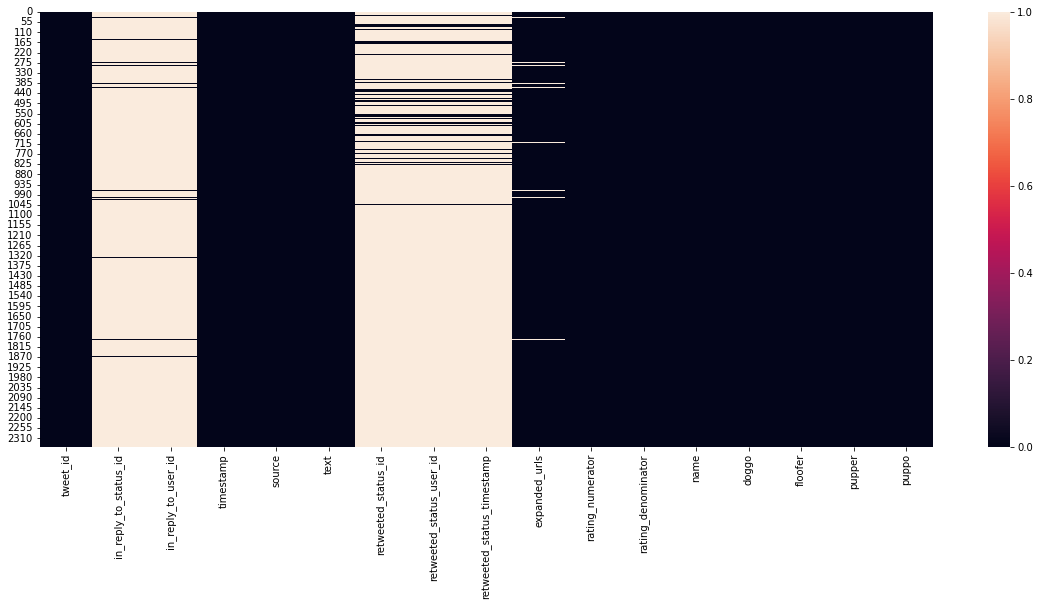

In [17]:
# visualizing missing data
fig, ax = plt.subplots(figsize = (20,8))
ax = sns.heatmap(df_tweets.isnull(), vmin=0, vmax = 1)
plt.show()

### **Further Assessment** (deep dive into individual columns)

### tweet_id

In [18]:
# checking the values for extremes
df_tweets['tweet_id'].sort_values()

2355    666020888022790149
2354    666029285002620928
2353    666033412701032449
2352    666044226329800704
2351    666049248165822465
               ...        
4       891327558926688256
3       891689557279858688
2       891815181378084864
1       892177421306343426
0       892420643555336193
Name: tweet_id, Length: 2356, dtype: int64

In [19]:
# sampling the data
df_tweets['tweet_id'].sample(5)

1245    711732680602345472
1999    672523490734551040
1281    708810915978854401
1144    727286334147182592
112     870804317367881728
Name: tweet_id, dtype: int64

### timestamp

In [20]:
# sampling the columns
df_tweets['timestamp'].sample(5)

2316    2015-11-17 16:09:56 +0000
1275    2016-03-14 00:49:23 +0000
1593    2016-01-11 03:17:53 +0000
285     2017-03-07 00:57:32 +0000
469     2017-01-05 02:09:53 +0000
Name: timestamp, dtype: object

In [21]:
# sorting values
df_tweets['timestamp'].sort_values()

2355    2015-11-15 22:32:08 +0000
2354    2015-11-15 23:05:30 +0000
2353    2015-11-15 23:21:54 +0000
2352    2015-11-16 00:04:52 +0000
2351    2015-11-16 00:24:50 +0000
                  ...            
4       2017-07-29 16:00:24 +0000
3       2017-07-30 15:58:51 +0000
2       2017-07-31 00:18:03 +0000
1       2017-08-01 00:17:27 +0000
0       2017-08-01 16:23:56 +0000
Name: timestamp, Length: 2356, dtype: object

### source

In [22]:
# sampling the data
df_tweets['source'].sample(10)

598     <a href="http://twitter.com/download/iphone" r...
2       <a href="http://twitter.com/download/iphone" r...
984     <a href="http://twitter.com/download/iphone" r...
1191    <a href="http://twitter.com/download/iphone" r...
742     <a href="http://twitter.com/download/iphone" r...
778     <a href="http://twitter.com/download/iphone" r...
1642    <a href="http://twitter.com/download/iphone" r...
2202    <a href="http://twitter.com/download/iphone" r...
1830    <a href="http://twitter.com/download/iphone" r...
1338    <a href="http://twitter.com/download/iphone" r...
Name: source, dtype: object

### expanded_url

*I suspect this archive contains retweets*<br>
*I'll check for that now...*

In [23]:
mask = df_tweets.duplicated(subset='expanded_urls', keep='last')
df_tweets[['expanded_urls', 'text']][mask].dropna()

,expanded_urls,text
68,https://twitter.com/dog_rates/status/878057613...,RT @dog_rates: This is Emmy. She was adopted t...
73,"https://www.gofundme.com/3yd6y1c,https://twitt...",RT @dog_rates: Meet Shadow. In an attempt to r...
74,https://twitter.com/dog_rates/status/669000397...,RT @dog_rates: Meet Terrance. He's being yelle...
91,https://twitter.com/dog_rates/status/866334964...,RT @dog_rates: This is Coco. At first I though...
97,https://www.gofundme.com/help-my-baby-sierra-g...,RT @dog_rates: This is Sierra. She's one preci...
...,...,...
860,https://twitter.com/dog_rates/status/673295268...,RT @dog_rates: Meet Eve. She's a raging alcoho...
937,https://twitter.com/dog_rates/status/681523177...,RT @dog_rates: This is Carly. She's actually 2...
1012,https://twitter.com/dog_rates/status/704761120...,RT @dog_rates: This pupper killed this great w...
1023,https://twitter.com/dog_rates/status/667866724...,RT @dog_rates: This is Shaggy. He knows exactl...


In [24]:
# checking for duplicate images and tweet ids
mask = df_tweets[['tweet_id','expanded_urls']].duplicated(keep=False)
df_tweets[mask]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


*There are retweets in this archive and they are all prefixed by `RT`*

### text

In [25]:
# checking for duplicates
mask = df_tweets.duplicated(subset='text', keep='last')
df_tweets[mask]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### rating_numerator

In [26]:
# checking value counts
df_tweets['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

*I will perform checks on the ratings with the fewest counts to check for parsing errors*

In [27]:
# checking value counts
df_tweets['rating_numerator'].value_counts().tail(26)

75      2
15      2
420     2
0       2
80      1
144     1
17      1
26      1
20      1
121     1
143     1
44      1
60      1
45      1
50      1
99      1
204     1
1776    1
165     1
666     1
27      1
182     1
24      1
960     1
84      1
88      1
Name: rating_numerator, dtype: int64

In [28]:
# getting the numerators with the lowest count and putting into a list
num = df_tweets['rating_numerator'].value_counts().tail(26).index.to_list()
num

[75,
 15,
 420,
 0,
 80,
 144,
 17,
 26,
 20,
 121,
 143,
 44,
 60,
 45,
 50,
 99,
 204,
 1776,
 165,
 666,
 27,
 182,
 24,
 960,
 84,
 88]

In [29]:
# writing a loop to print the text containing the ratings for each numerator in num defined above
for n in num:
    print(f"numerator: {n}")
    print(f"{df_tweets['text'][df_tweets['rating_numerator'] == n]} \n")
    

numerator: 75
340    RT @dog_rates: This is Logan, the Chow who liv...
695    This is Logan, the Chow who lived. He solemnly...
Name: text, dtype: object 

numerator: 15
285    RT @KibaDva: I collected all the good dogs!! 1...
291    @bragg6of8 @Andy_Pace_ we are still looking fo...
Name: text, dtype: object 

numerator: 420
188     @dhmontgomery We also gave snoop dogg a 420/10...
2074    After so many requests... here you go.\n\nGood...
Name: text, dtype: object 

numerator: 0
315     When you're so blinded by your systematic plag...
1016    PUPDATE: can't see any. Even if I could, I cou...
Name: text, dtype: object 

numerator: 80
1254    Here's a brigade of puppers. All look very pre...
Name: text, dtype: object 

numerator: 144
1779    IT'S PUPPERGEDDON. Total of 144/120 ...I think...
Name: text, dtype: object 

numerator: 17
55    @roushfenway These are good dogs but 17/10 is ...
Name: text, dtype: object 

numerator: 26
1712    Here we have uncovered an entire battalion of ...
N

*Ratings of numerator one seem low for such a cheery tweet archive*.<br>
*Checking for these ratings...*

In [30]:
df_tweets['text'][df_tweets['rating_numerator'] == 1]

605     RT @dog_rates: Not familiar with this breed. N...
1446    After reading the comments I may have overesti...
1869    What kind of person sends in a picture without...
1940    The millennials have spoken and we've decided ...
2038    After 22 minutes of careful deliberation this ...
2091    Flamboyant pup here. Probably poisonous. Won't...
2261    Never seen dog like this. Breathes heavy. Tilt...
2335    This is an Albanian 3 1/2 legged  Episcopalian...
2338    Not familiar with this breed. No tail (weird)....
Name: text, dtype: object

*checking for ratings of numerator two too...*

In [31]:
df_tweets['text'][df_tweets['rating_numerator'] == 2]

1761    Exotic pup here. Tail long af. Throat looks sw...
1764    This is Crystal. She's a shitty fireman. No se...
1920    This is Henry. He's a shit dog. Short pointy e...
2079    Scary dog here. Too many legs. Extra tail. Not...
2237    This lil pup is Oliver. Hops around. Has wings...
2246    This is Tedrick. He lives on the edge. Needs s...
2310    Unfamiliar with this breed. Ears pointy af. Wo...
2326    This is quite the dog. Gets really excited whe...
2349    This is an odd dog. Hard on the outside but lo...
Name: text, dtype: object

### Summary of parsing errors assessment
> *row 340 : numerator is actually 9.75. Parsed as 75*<br>
> *row 695 : numerator is actually 9.75. Parsed as 75 (Duplicate of row 340)*<br>
> *row 55 : numerator is actually 13. Parsed as 17*<br>
> *row 1712 : numerator is actually 11.26. Parsed as 26*<br>
> *row 1202 : numerator is actually 11. Parsed as 50*<br>
> *row 763 : numerator is actually 11.27. Parsed as 27*<br>
> *row  313 :  contains a retweet of a non-existent post. should be removed*<br> 
> *row 2335 : numerator is actually 9. Parsed as 1*

### rating_denominator

In [32]:
# checking value counts
df_tweets['rating_denominator'].value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [33]:
# checking value counts
df_tweets['rating_denominator'].value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [34]:
# getting the denominators with the lowest count, excluding 10 and putting into a list
den = df_tweets['rating_denominator'].value_counts().tail(17).index.to_list()
den

[11, 50, 20, 80, 70, 7, 15, 150, 170, 0, 90, 40, 130, 110, 16, 120, 2]

In [35]:
# writing a loop to print the text containing the ratings for each numerator in num defined above
for d in den:
    print(f"denominator: {d}")
    print(f"{df_tweets['text'][df_tweets['rating_denominator'] == d]} \n")

denominator: 11
784     RT @dog_rates: After so many requests, this is...
1068    After so many requests, this is Bretagne. She ...
1662    This is Darrel. He just robbed a 7/11 and is i...
Name: text, dtype: object 

denominator: 50
1202    This is Bluebert. He just saw that both #Final...
1274    From left to right:\nCletus, Jerome, Alejandro...
1351    Here is a whole flock of puppers.  60/50 I'll ...
Name: text, dtype: object 

denominator: 20
1165    Happy 4/20 from the squad! 13/10 for all https...
1598    Yes I do realize a rating of 4/20 would've bee...
Name: text, dtype: object 

denominator: 80
1254    Here's a brigade of puppers. All look very pre...
1843    Here we have an entire platoon of puppers. Tot...
Name: text, dtype: object 

denominator: 70
433    The floofs have been released I repeat the flo...
Name: text, dtype: object 

denominator: 7
516    Meet Sam. She smiles 24/7 &amp; secretly aspir...
Name: text, dtype: object 

denominator: 15
342    @docmisterio account

### Summary of parsing errors assessment
> *row 784 : denominator is actually 10. Parsed as 11*<br>
> *row 1068 : seems to be a duplicate of row 784*<br>
> *row 1662 : denominator is actually 10. Parsed as 11*<br>
> *row 1202 : denominator is actually 10. Parsed as 50*<br>
> *row 1165 : denominator is actually 10. Parsed as 20*<br>
> *row 342 : date parsed as rating. No rating in sight*<br>
> *row 313 : retweet of non-present tweet*<br>
> *row 1663 : seems not to be a rating in fact*<br>
> *row 2335 : denominator is actually 10. Parsed as 2*<br>

There are multiple errors with these rating columns that arose from parsing. <br>

I should remove the retweet and the row that seems not to be a rating

I suspect there would be many more parsing errors since I only checked for tweets with low ratings. To further investigate these issues further, I will create a copy of the the dataframe to perform creating operations on.

In [36]:
# creating a copy dataframe
df_tweets_copy = df_tweets.copy()

In [37]:
pattern = "(\d+(\.\d+)?\/\d+(\.\d+)?)" # I found this regex pattern on StackOverflow; to extract the ratings fractions from text

# extracting ratings
df_tweets_copy['rating'] = df_tweets_copy['text'].str.extract(pattern, expand=True)[0]

In [38]:
# splitting by "/"
df_tweets_copy[['num', 'den']] = df_tweets_copy['rating'].str.split('/', n=1, expand=True)

In [39]:
# checking datatypes of corresponding columns
df_tweets_copy['num'].dtype

dtype('O')

In [40]:
# checking datatypes of corresponding columns
df_tweets_copy['rating_numerator'].dtype

dtype('int64')

In [41]:
# converting rating_numerator & rating_denominator to strings to enable comparison between columns
df_tweets_copy['rating_numerator'] = df_tweets_copy['rating_numerator'].astype("str")
df_tweets_copy['rating_denominator'] = df_tweets_copy['rating_denominator'].astype("str")

In [42]:
# checking for differences between original column and new extract
df_tweets_copy["num_check"] = df_tweets_copy[["rating_numerator", "num"]].apply(lambda x: False if (x[0] != x[1]) else True, axis = 1)

In [43]:
# sampling the columns
df_tweets_copy[['rating_numerator','num','num_check']].sample(10)

,rating_numerator,num,num_check
1152,11,11,True
2061,10,10,True
2314,8,8,True
1808,5,5,True
1394,9,9,True
1170,10,10,True
1542,11,11,True
2140,10,10,True
1641,11,11,True
2097,8,8,True


In [44]:
# checking for the counts of incongruities
df_tweets_copy['num_check'].value_counts()

True     2349
False       7
Name: num_check, dtype: int64

So, there are 7 instances where the values I extracted is not equal to the original.<br>
Exploring the differences...

In [45]:
mask = df_tweets_copy['num_check'] == False
df_tweets_copy[['rating_numerator','num','num_check']][mask]

,rating_numerator,num,num_check
45,5,13.5,False
340,75,9.75,False
387,7,007,False
695,75,9.75,False
763,27,11.27,False
1689,5,9.5,False
1712,26,11.26,False


This shows that the original dataframe extracted the mantissa as the numerator values.<br>
Checking for the denominator as well...


In [46]:
# checking for differences between original column and new extract
df_tweets_copy["den_check"] = df_tweets_copy[["rating_denominator", "den"]].apply(lambda x: False if (x[0] != x[1]) else True, axis = 1)

In [47]:
# sampling the columns
df_tweets_copy[['rating_denominator','den','den_check']].sample(10)

,rating_denominator,den,den_check
1357,10,10,True
2123,10,10,True
1107,10,10,True
717,10,10,True
1026,10,10,True
1186,10,10,True
1240,10,10,True
8,10,10,True
271,10,10,True
1730,10,10,True


In [48]:
# checking for the counts of incongruities
df_tweets_copy['den_check'].value_counts()

True     2355
False       1
Name: den_check, dtype: int64

In [49]:
mask = df_tweets_copy['den_check'] == False
df_tweets_copy[['rating_denominator','den','den_check']][mask]

,rating_denominator,den,den_check
313,0,00,False


I identified this row in my summary of parsing errors assessment, as a retweet of a non-present tweet; to be removed...<br>
Now, I will check for tweets that have multiple fractions...as the extraction does not account for these cases

In [50]:
df_tweets_copy['no_of_ratings_per_tweet'] = df_tweets_copy['text'].str.count(pattern)

In [51]:
df_tweets_copy['no_of_ratings_per_tweet'].value_counts()

1    2323
2      32
3       1
Name: no_of_ratings_per_tweet, dtype: int64

In [52]:
# viewing tweets that don't have 1 rating
mask = df_tweets_copy['no_of_ratings_per_tweet'] != 1
df_tweets_copy[mask][['text','no_of_ratings_per_tweet']].head()

,text,no_of_ratings_per_tweet
55,@roushfenway These are good dogs but 17/10 is ...,2
313,@jonnysun @Lin_Manuel ok jomny I know you're e...,2
561,"RT @dog_rates: ""Yep... just as I suspected. Yo...",2
766,"""Yep... just as I suspected. You're not flossi...",2
784,"RT @dog_rates: After so many requests, this is...",2


In [53]:
df_tweets_copy[mask][['text','num','rating_numerator','no_of_ratings_per_tweet']]

,text,num,rating_numerator,no_of_ratings_per_tweet
55,@roushfenway These are good dogs but 17/10 is ...,17,17,2
313,@jonnysun @Lin_Manuel ok jomny I know you're e...,960,960,2
561,"RT @dog_rates: ""Yep... just as I suspected. Yo...",12,12,2
766,"""Yep... just as I suspected. You're not flossi...",12,12,2
784,"RT @dog_rates: After so many requests, this is...",9,9,2
860,RT @dog_rates: Meet Eve. She's a raging alcoho...,8,8,2
1007,This is Bookstore and Seaweed. Bookstore is ti...,10,10,2
1068,"After so many requests, this is Bretagne. She ...",9,9,2
1165,Happy 4/20 from the squad! 13/10 for all https...,4,4,2
1202,This is Bluebert. He just saw that both #Final...,50,50,2


For these rows, I will decide on the treatment on a case-by-case basis in the cleaning section

----
### name, doggo, floofer, pupper, puppo

In [54]:
# checking value counts
df_tweets["name"].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [55]:
df_tweets["doggo"].value_counts(normalize=True) * 100

None     95.882852
doggo     4.117148
Name: doggo, dtype: float64

In [56]:
# checking proportions of values
df_tweets["floofer"].value_counts(normalize=True) * 100 

None       99.575552
floofer     0.424448
Name: floofer, dtype: float64

In [57]:
# checking proportions of values
df_tweets["pupper"].value_counts(normalize=True) * 100

None      89.091681
pupper    10.908319
Name: pupper, dtype: float64

In [58]:
# checking proportions of values
df_tweets["puppo"].value_counts(normalize=True) * 100

None     98.726655
puppo     1.273345
Name: puppo, dtype: float64

*There are 'None's in more than 90% of these rows overall*

In [59]:
df_tweets[['name']].sort_values(by='name').tail(60)

,name
2264,a
1004,a
1017,a
1785,a
2354,a
2198,a
1693,actually
1040,actually
1138,all
2333,an


*invalid names such as 'a', 'actually', 'all', 'an', ..., 'very' are present*

In [60]:
crit = df_tweets['name'] == 'None'
df_tweets[crit]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2342,666082916733198337,NaN,NaN,2015-11-16 02:38:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a well-established sunblockerspan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666082916...,6,10,None,None,None,None,None
2343,666073100786774016,NaN,NaN,2015-11-16 01:59:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Let's hope this flight isn't Malaysian (lol). ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666073100...,10,10,None,None,None,None,None
2344,666071193221509120,NaN,NaN,2015-11-16 01:52:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a northern speckled Rhododendron....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666071193...,9,10,None,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None


In [61]:
# developing Boolean arrays to filter for dogs with no classifactions
crit_1 = df_tweets['doggo'] == 'None'
crit_2 = df_tweets['floofer'] == 'None'
crit_3 = df_tweets['pupper'] == 'None'
crit_4 = df_tweets['puppo'] == 'None'

crit_all = crit_1 & crit_2 & crit_3 & crit_4

In [62]:
# executing filter
df_tweets[['tweet_id','name', 'doggo', 'floofer', 'pupper', 'puppo']][crit_all].head()

,tweet_id,name,doggo,floofer,pupper,puppo
0,892420643555336193,Phineas,None,None,None,None
1,892177421306343426,Tilly,None,None,None,None
2,891815181378084864,Archie,None,None,None,None
3,891689557279858688,Darla,None,None,None,None
4,891327558926688256,Franklin,None,None,None,None


In [63]:
len(df_tweets[['tweet_id','name', 'doggo', 'floofer', 'pupper', 'puppo']][crit_all])

1976

*There are 1976 dogs without classification*

------
-----
**`2(a)`**<br>
## **Visual Assessment of `df_neural`**

In [64]:
# Visual assessment
df_neural.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [65]:
# Visual assessment
df_neural.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [66]:
# Visual assessment
df_neural.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1321,756303284449767430,https://pbs.twimg.com/media/Cn7tyyZWYAAPlAY.jpg,1,golden_retriever,0.981652,True,cocker_spaniel,0.006790,True,Labrador_retriever,0.004325,True
1415,771102124360998913,https://pbs.twimg.com/media/CrOBSfgXgAABsTE.jpg,1,Labrador_retriever,0.568789,True,pug,0.179918,True,Staffordshire_bullterrier,0.034437,True
636,681242418453299201,https://pbs.twimg.com/media/CXRCXesVAAArSXt.jpg,1,motor_scooter,0.255934,False,rifle,0.145202,False,assault_rifle,0.097000,False
192,669567591774625800,https://pbs.twimg.com/media/CUrIK1DWoAAhECq.jpg,1,Chihuahua,0.980511,True,toy_terrier,0.009166,True,miniature_pinscher,0.002659,True
65,667174963120574464,https://pbs.twimg.com/media/CUJIFoJWsAAL3Dc.jpg,1,toy_poodle,0.266437,True,Chihuahua,0.243223,True,bluetick,0.072806,True


------
**`2(b)`**<br>
## **Programmatic Assessment of `df_neural`**

In [67]:
df_neural.shape

(2075, 12)

In [68]:
df_neural.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [69]:
df_neural.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [70]:
# calculating the number of nulls per column
df_neural.isna().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [71]:
# summary statistics
df_neural.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [72]:
# summary statistics for 'object' datatype
df_neural.describe(include='object')

,jpg_url,p1,p2,p3
count,2075,2075,2075,2075
unique,2009,378,405,408
top,https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg,golden_retriever,Labrador_retriever,Labrador_retriever
freq,2,150,104,79


In [73]:
# checking for duplicates in the whole dataframe
df_neural[df_neural.duplicated(keep=False)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [74]:
# checking for duplicates in the 'jpg_url'
df_neural[df_neural.duplicated(subset='jpg_url', keep=False)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
85,667509364010450944,https://pbs.twimg.com/media/CUN4Or5UAAAa5K4.jpg,1,beagle,0.636169,True,Labrador_retriever,0.119256,True,golden_retriever,0.082549,True
224,670319130621435904,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
241,670444955656130560,https://pbs.twimg.com/media/CU3mITUWIAAfyQS.jpg,1,English_springer,0.403698,True,Brittany_spaniel,0.347609,True,Welsh_springer_spaniel,0.137186,True
327,671896809300709376,https://pbs.twimg.com/media/CVMOlMiWwAA4Yxl.jpg,1,chow,0.243529,True,hamster,0.227150,False,Pomeranian,0.056057,True
382,673320132811366400,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1970,868880397819494401,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
1992,873697596434513921,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
2041,885311592912609280,https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg,1,Labrador_retriever,0.908703,True,seat_belt,0.057091,False,pug,0.011933,True
2051,887473957103951883,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197,True,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True


*There are duplicates in the 'jpg_url' column. Probably retweets*

In [75]:
df_neural['p1'].value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
pillow                  1
carousel                1
bald_eagle              1
lorikeet                1
orange                  1
Name: p1, Length: 378, dtype: int64

In [76]:
mask = df_neural['p1_dog'] == False
df_neural[mask]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2026,882045870035918850,https://pbs.twimg.com/media/DD2oCl2WAAEI_4a.jpg,1,web_site,0.949591,False,dhole,0.017326,False,golden_retriever,0.006941,True
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False


In [77]:
# number of times the p1 prediction level does not predict dog
mask = df_neural['p2_dog'] == False
len(df_neural[mask])

522

In [78]:
# number of times the p2 prediction level does not predict dog
mask = df_neural['p2_dog'] == False
len(df_neural[mask])

522

In [79]:
# number of times the p3 prediction level does not predict dog
mask = df_neural['p3_dog'] == False
len(df_neural[mask])

576

In [80]:
# checking to see whether the algorithm predicts if there is a dog or not at all prediction levels
df_neural[['p1', 'p2' ,'p3', 'p1_dog', 'p2_dog', 'p3_dog', 'p1_conf', 'p2_conf', 'p3_conf']].sample(5)

,p1,p2,p3,p1_dog,p2_dog,p3_dog,p1_conf,p2_conf,p3_conf
1410,Madagascar_cat,skunk,paper_towel,False,False,False,0.494803,0.161184,0.091572
1522,golden_retriever,Sussex_spaniel,Labrador_retriever,True,True,True,0.735163,0.064897,0.047704
1752,Pembroke,Cardigan,basenji,True,True,True,0.990793,0.008919,0.000262
258,Labrador_retriever,American_black_bear,brown_bear,True,False,False,0.244889,0.056993,0.053993
1513,Pembroke,Cardigan,chow,True,True,True,0.709512,0.287178,0.000570


In [81]:
# checking for rows where the algorithm disagrees if there is a dog in the picture or not
crit_1 = df_neural['p1_dog'] != df_neural['p2_dog']
crit_2 = df_neural['p1_dog'] != df_neural['p3_dog']
crit_3 = df_neural['p2_dog'] != df_neural['p3_dog']
crit_all = crit_1 | crit_2 | crit_3
df_neural[['p1','p2','p3', 'jpg_url','p1_dog','p2_dog','p3_dog','p1_conf','p2_conf','p3_conf']][crit_all]

,p1,p2,p3,jpg_url,p1_dog,p2_dog,p3_dog,p1_conf,p2_conf,p3_conf
7,chow,Tibetan_mastiff,fur_coat,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,True,True,False,0.692517,0.058279,0.054449
8,shopping_cart,shopping_basket,golden_retriever,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,False,False,True,0.962465,0.014594,0.007959
22,ox,Newfoundland,groenendael,https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg,False,True,True,0.416669,0.278407,0.102643
33,llama,Irish_terrier,dingo,https://pbs.twimg.com/media/CT-jNYqW4AAPi2M.jpg,False,True,False,0.505184,0.104109,0.062071
34,Chesapeake_Bay_retriever,chain_saw,power_drill,https://pbs.twimg.com/media/CT-nsTQWEAEkyDn.jpg,True,False,False,0.184130,0.056775,0.036763
...,...,...,...,...,...,...,...,...,...,...
2050,Mexican_hairless,sea_lion,Weimaraner,https://pbs.twimg.com/ext_tw_video_thumb/88734...,True,False,True,0.330741,0.275645,0.134203
2063,French_bulldog,Labrador_retriever,muzzle,https://pbs.twimg.com/media/DFl99B1WsAITKsg.jpg,True,True,False,0.377417,0.151317,0.082981
2068,Appenzeller,Border_collie,ice_lolly,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,True,True,False,0.341703,0.199287,0.193548
2069,Chesapeake_Bay_retriever,Irish_terrier,Indian_elephant,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,True,True,False,0.425595,0.116317,0.076902


*The algorithm is making some predictions that are not dogs*<br>
*In 508 rows out of 2075 of the entire dataframe, the neural network disagrees about the content of the the image*<br>

*Checking the pictures (via their urls), I see that some of the dogs are in the background, some pictures do not have dogs in them, or some dogs are in unsual positions or costume. That explains the unusual classifications*

----
------
**`3(a)`**<br>
### **Visual Assessment of `df_json`**

In [82]:
# Visual assessment
df_json.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8287,37931
1,892177421306343426,6119,32575
2,891815181378084864,4054,24530
3,891689557279858688,8424,41274
4,891327558926688256,9128,39464


In [83]:
# Visual assessment
df_json.tail()

,tweet_id,retweet_count,favorite_count
2335,666049248165822465,42,106
2336,666044226329800704,137,292
2337,666033412701032449,43,123
2338,666029285002620928,46,125
2339,666020888022790149,498,2530


In [84]:
# Visual assessment
df_json.sample(5)

,tweet_id,retweet_count,favorite_count
1266,708810915978854401,7353,17189
1231,711694788429553666,19349,34183
1506,690690673629138944,848,2430
1348,702932127499816960,763,2700
54,881633300179243008,7,124


------
**`3(b)`**<br>
### **Programmatic Assessment of `df_json`**

In [85]:
df_json.shape

(2340, 3)

In [86]:
df_json.columns

Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object')

In [87]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2340 non-null   int64
 1   retweet_count   2340 non-null   int64
 2   favorite_count  2340 non-null   int64
dtypes: int64(3)
memory usage: 55.0 KB


In [88]:
# calculating the number of nulls per column
df_json.isna().sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

In [89]:
# summary statistics
df_json.describe()

,tweet_id,retweet_count,favorite_count
count,2.340000e+03,2340.000000,2340.000000
mean,7.422176e+17,2917.531624,7940.355983
std,6.832564e+16,4915.476215,12298.675488
min,6.660209e+17,0.000000,0.000000
25%,6.783394e+17,584.750000,1370.750000
50%,7.186224e+17,1361.000000,3451.000000
75%,7.986954e+17,3398.000000,9720.000000
max,8.924206e+17,83310.000000,163821.000000


In [90]:
# checking for duplicates
df_json[df_json.duplicated(keep=False)]

,tweet_id,retweet_count,favorite_count


*Looks clean*

<a id='assessingsum'></a>
## Assessing Summary

**df_tweets**
### `Quality`<br>
> - *the name column contain invalid values like 'a', 'None'*<br>
> - *'None' is the most common value in the name column with a count of 745* <br>
> - *From the heatmap, it is visible that in_reply_to_status_id and in_reply_to_user_id share rows with nans; retweeted_status_id, retweeted_status_user_id and*<br> *retweeted_status_timestamp also share rows with nans*

> rating_numerator column:<br>
> - *row 340 : numerator is actually 9.75. Parsed as 75*<br>
> - *row 695 : numerator is actually 9.75. Parsed as 75 (Duplicate of row 340)*<br>
> - *row 55 : numerator is actually 13. Parsed as 17*<br>
> - *row 1712 : numerator is actually 11.26. Parsed as 26*<br>
> - *row 1202 : numerator is actually 11. Parsed as 50*<br>
> - *row 763 : numerator is actually 11.27. Parsed as 27*<br>
> - *row  313 :  contains a retweet of a non-existent post. should be removed*<br> 
> - *row 2335 : numerator is actually 9. Parsed as 1*

> rating_denominator column:<br>
> - *row 784 : denominator is actually 10. Parsed as 11*<br>
> - *row 1068 : seems to be a duplicate of row 784*<br>
> - *row 1662 : denominator is actually 10. Parsed as 11*<br>
> - *row 1202 : denominator is actually 10. Parsed as 50*<br>
> - *row 1165 : denominator is actually 10. Parsed as 20*<br>
> - *row 342 : date parsed as rating. No rating in sight*<br>
> - *row 313 : retweet of non-present tweet*<br>
> - *row 1663 : seems not to be a rating in fact*<br>
> - *row 2335 : denominator is actually 10. Parsed as 2*<br>

*There are 'None's in more than 90% of these rows overall*<br>
*invalid names such as 'a', 'actually', 'all', 'an', ..., 'very' are present in the name column*<br>
*There are 1976 dogs without classification i.e inputed as 'None'*<br>
*incorrect extraction of ratings due to the text field containing multiple ratings*<br>


### `Tidiness`<br>
> - redundant 'source' column
> - variable names as column names e.g (doggo, floofer, pupper, puppo)
> - timestamp is in object dtype; should be in timestamp
> - in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp values are mostly nans
> - All three dataset are part of the same observational unit and have to be merged
-----

**df_neural**
### `Quality`<br>
> - *There are duplicates in the 'jpg_url' column. Probably retweets*
> - *The algorithm is making some predictions that are not dogs. Perhaps the images are unclear*<br>
> - *543 rows out of 2075 of the entire dataframe, are not dog predictions at the p1 level; 522 at the p2 level and 576 at the p3 level*<br>
> - *The prediction columns should be collapsed*
>
> - *Checking the pictures (via their urls), I see that some of the dogs are in the background and some pictures do not have dogs in them. That explains the unusual classifications*

### `Tidiness`<br>
> - All three dataset are part of the same observational unit and have to be merged
--------

**df_json**
### `Quality`<br>
. . .
### `Tidiness`<br>
> - All three dataset are part of the same observational unit and have to be merged.

<a id='assessing'></a>
# `Clean`

In [91]:
# creating copies

df_tweets_clean = df_tweets.copy()
df_neural_clean = df_neural.copy()
df_json_clean = df_json.copy()

### **tweets dataframe**

In [92]:
# before
print(f"Before merging, no. of tweets archive rows = {len(df_tweets_clean)}")
print(f"Before merging, no. of prediction dataset rows = {len(df_neural_clean)}")
print(f"Before merging, no. of api dataset rows = {len(df_json_clean)}")

Before merging, no. of tweets archive rows = 2356
Before merging, no. of prediction dataset rows = 2075
Before merging, no. of api dataset rows = 2340


In [93]:
# merging the dataframes together before cleaning sinnce they share common rows

# column to be merged on needs to be the index of the dataframes, to use .join method

df_tweets_clean.set_index('tweet_id', inplace=True)
df_neural_clean.set_index('tweet_id', inplace=True)
df_json_clean.set_index('tweet_id', inplace=True)

other = [df_neural_clean, df_json_clean]
df_join = df_tweets_clean.join(other, how='inner')

In [94]:
# inspecting
df_join.shape

(2067, 29)

In [95]:
df_join.columns

Index(['in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source',
       'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'retweet_count', 'favorite_count'],
      dtype='object')

In [96]:
df_join.sample(7)

,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
tweet_id,,,,,,,,,,,,,,,,,,,,,
789268448748703744,NaN,NaN,2016-10-21 00:53:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stella. She's happier than I will ever...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/789268448...,10,...,0.812860,True,Siberian_husky,0.120853,True,Eskimo_dog,0.024269,True,2820,9746
748692773788876800,NaN,NaN,2016-07-01 01:40:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",That is Quizno. This is his beach. He does not...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/748692773...,10,...,0.337871,False,plow,0.269287,False,oxcart,0.245653,False,1420,4446
828708714936930305,NaN,NaN,2017-02-06 20:55:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Fiona. She's an exotic dog. Seems rath...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/828708714...,10,...,0.942911,False,Mexican_hairless,0.008388,True,ice_lolly,0.006206,False,12103,38535
743609206067040256,NaN,NaN,2016-06-17 01:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Stark. He just had his first ice cream co...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743609206...,10,...,0.982794,True,American_Staffordshire_terrier,0.004766,True,Great_Dane,0.003432,True,1469,4681
668274247790391296,NaN,NaN,2015-11-22 03:46:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sophie. Her son just got in the car to le...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668274247...,10,...,0.406374,True,Lakeland_terrier,0.263854,True,toy_poodle,0.150844,True,235,832
666804364988780544,NaN,NaN,2015-11-18 02:25:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jockson. He is a Pinnacle Sagittarius....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666804364...,8,...,0.328792,True,Brittany_spaniel,0.283545,True,Ibizan_hound,0.057461,True,93,240
744995568523612160,NaN,NaN,2016-06-20 20:49:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Abby. She got her face stuck in a glas...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/744995568...,9,...,0.427481,True,Shih-Tzu,0.146336,True,Tibetan_terrier,0.134269,True,660,3108


In [97]:
# creating a copy of the merged dataframes
df_join_clean = df_join.copy()

### ***Issue 1***: *Retweets*
`df_join_clean`: Retweets are the cause of multiple images appearing in the dataframe

### ***Define***<br>
Identify the retweets and remove them

### ***Code***

In [98]:
# checking for retweets
df_join_clean[['retweeted_status_id']].dropna()

,retweeted_status_id
tweet_id,
885311592912609280,8.305833e+17
877611172832227328,8.768508e+17
867072653475098625,8.650134e+17
860924035999428608,8.609145e+17
851953902622658560,8.293743e+17
...,...
754874841593970688,6.791584e+17
752309394570878976,6.753544e+17
711998809858043904,7.119983e+17


In [99]:
# passing replies index to a list
replies = df_join_clean[['in_reply_to_status_id']].dropna().index.to_list()

In [100]:
# passing retweets indexes to a list
retweets = df_join_clean[['retweeted_status_id']].dropna().index.to_list()

In [101]:
# dropping retweets
df_join_clean.drop(index=retweets, inplace=True) 

In [102]:
df_join_clean.drop(index=replies, inplace=True)

In [103]:
# checking for retweets
mask = df_join_clean['text'].str.startswith('RT')

In [104]:
# I found a retweet that for some reasons was not captured by the above codes
df_join_clean[mask]

,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
tweet_id,,,,,,,,,,,,,,,,,,,,,
675489971617296384,NaN,NaN,2015-12-12 01:38:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT until we find this dog. Clearly a cool dog ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675489971...,10,...,0.139613,True,seat_belt,0.118647,False,Old_English_sheepdog,0.093952,True,623,1339


In [105]:
# dropping the row
df_join_clean.drop(index=675489971617296384, inplace=True)

### ***Test***

In [106]:
# checking the new shape
df_join_clean.shape

(1968, 29)

In [107]:
# checking for duplicates
mask = df_join_clean.duplicated(subset='jpg_url', keep=False)
df_join_clean[['text','jpg_url']][mask]

,text,jpg_url
tweet_id,,


In [108]:
mask = df_join_clean['text'].str.startswith('RT')

In [109]:
df_join_clean[mask]

,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
tweet_id,,,,,,,,,,,,,,,,,,,,,


### ***Issue 2***: *Nulls*
`df_join_clean`: There are NaNs in this DataFrame that need to be taken care of.

### ***Define***<br>
Visualize the nulls, justify dropping them and then drop the offending columns if justification holds

### ***Code***

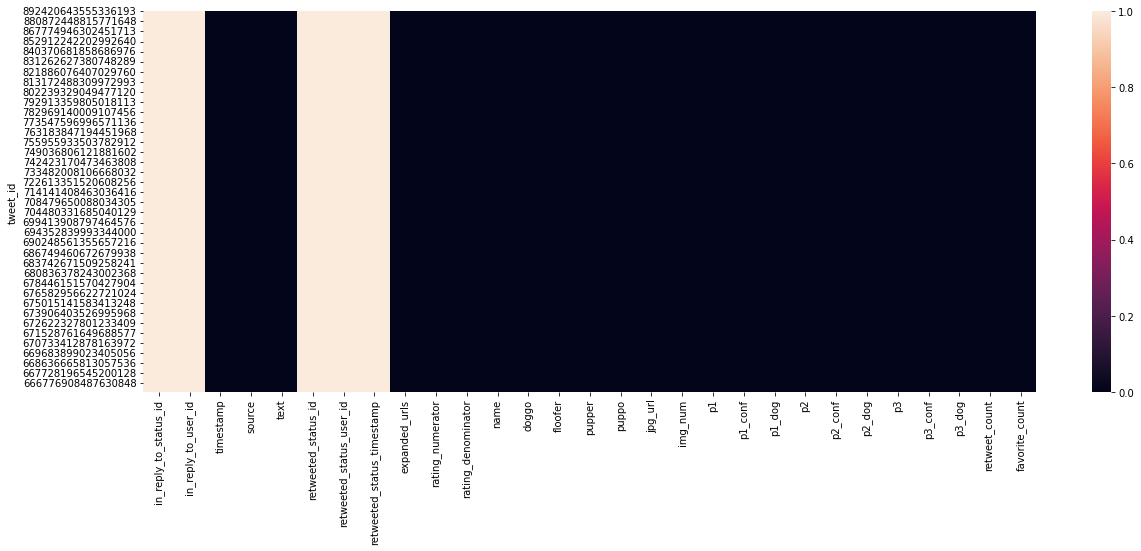

In [110]:
# visualizing null values
fig, ax = plt.subplots(figsize = (20,7))
ax = sns.heatmap(df_join_clean.isnull(), vmin = 0, vmax = 1)

In [111]:
# Because I dropped retweets in the first cleanig step, these columns seem to be empty
# checking % of nulls in these columns
df_join_clean[['in_reply_to_status_id',
               'in_reply_to_user_id',
               'retweeted_status_id',
               'retweeted_status_user_id',
               'retweeted_status_timestamp']].isnull().mean() * 100


in_reply_to_status_id         100.0
in_reply_to_user_id           100.0
retweeted_status_id           100.0
retweeted_status_user_id      100.0
retweeted_status_timestamp    100.0
dtype: float64

In [112]:
columns_to_drop = ['in_reply_to_status_id',
               'in_reply_to_user_id',
               'retweeted_status_id',
               'retweeted_status_user_id',
               'retweeted_status_timestamp']

df_join_clean.drop(columns = columns_to_drop, inplace=True)

### ***Test***

In [113]:
# checking whether the columns were dropped
columns_to_drop in df_join_clean.columns.to_list()

False

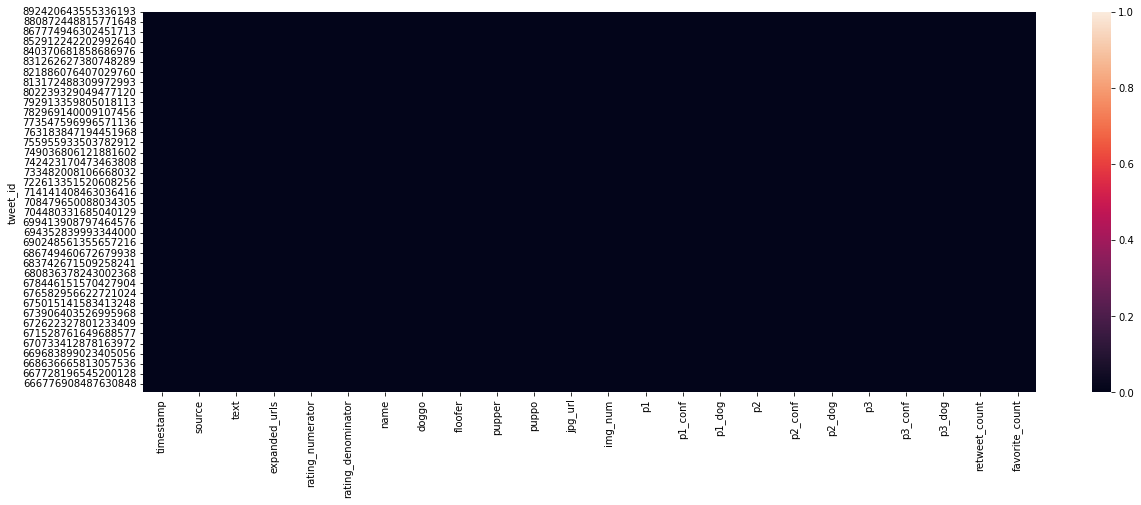

In [114]:
# visualizing
fig, ax = plt.subplots(figsize = (20,7))
ax = sns.heatmap(df_join_clean.isnull(), vmin = 0, vmax = 1)

In [115]:
# checking for nulls throughout the dataframe
df_join_clean.isnull().any().all()

False

### ***Issue 3***: *Wrong datatype of timestamp column*
`df_join_clean`: timestamp column needs to be converted

### ***Define***<br>
Check for the datatype of the timestamp column and convert it to a datetime column

In [116]:
# checking for datatype of the timestamp column
df_join_clean.timestamp.dtype

dtype('O')

In [117]:
# converting to datetime
df_join_clean['timestamp'] = pd.to_datetime(df_join_clean['timestamp'])

### ***Test***

In [118]:
df_join_clean['timestamp'].dtype

datetime64[ns, UTC]

### ***Issue 4***: *Source column HTML codes*
`df_join_clean`: Between the `<a></a>` tags in the `source` column lies information about the tweets source

### ***Define***<br>
Check source column and use a regex pattern to extract the content between the tags

### ***Code***

In [119]:
# checking ...
pd.set_option('display.max_colwidth', 250)
df_join_clean[['source']].sample(5)

,source
tweet_id,
798933969379225600,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"
708469915515297792,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"
847116187444137987,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"
781163403222056960,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"
674042553264685056,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"


In [120]:
# extracting the contents between the <a></a> tags in the source column
df_join_clean['source'] = df_join_clean.source.str.extract("\>(.*?)\<", expand = True)

### ***Test***

In [121]:
# checking ...
df_join_clean['source'].value_counts()

Twitter for iPhone    1930
Twitter Web Client      28
TweetDeck               10
Name: source, dtype: int64

-------
### ***Issue 5***: *Dealing with incorrect numerator and denominator ratings*
`df_join_clean`: As a result of parsing errors (revealed in the assessment section), some of the numerator and denominator values are not correct

### ***Define***<br>
Extract fractions from the text column and split by "/". Then treat on a case-by-case basis for exceptions

In [122]:
df_join_clean[['text']].sample(2)

,text
tweet_id,
864279568663928832,This is Meatball. He doing what's known in the industry as a mid-strut mlem. H*ckin fancy boy. 12/10 I'd do anything for Meatball https://t.co/S2HdmFFPck
671154572044468225,Meet Holly. She's trying to teach small human-like pup about blocks but he's not paying attention smh. 11/10 &amp; 8/10 https://t.co/RcksaUrGNu


### ***Code***

In [123]:
pattern = "(\d+(\.\d+)?\/\d+(\.\d+)?)"

# extracting ratings using regex
df_join_clean['rating'] = df_join_clean['text'].str.extract(pattern, expand=True)[0]

In [124]:
# splitting by "/"
df_join_clean[['num', 'den']] = df_join_clean['rating'].str.split('/', n=1, expand=True)

In [125]:
# getting the number of fractions i.e ratings occurring in the text body
df_join_clean['no_of_ratings_per_tweet'] = df_join_clean['text'].str.count(pattern)

In [126]:
# aggregating counts of times fractions appear
df_join_clean['no_of_ratings_per_tweet'].value_counts()

1    1941
2      26
3       1
Name: no_of_ratings_per_tweet, dtype: int64

*There are 27 rows with more than 1 rating. Checking for these...*

In [127]:
# viewing tweets that don't have 1 rating
mask = df_join_clean['no_of_ratings_per_tweet'] != 1
df_join_clean[mask][['text','no_of_ratings_per_tweet']]

,text,no_of_ratings_per_tweet
tweet_id,,
777684233540206592,"""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",2
747600769478692864,This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ,2
740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",2
722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,2
716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,2
714258258790387713,Meet Travis and Flurp. Travis is pretty chill but Flurp can't lie down properly. 10/10 &amp; 8/10\nget it together Flurp https://t.co/Akzl5ynMmE,2
703356393781329922,This is Socks. That water pup w the super legs just splashed him. Socks did not appreciate that. 9/10 and 2/10 https://t.co/8rc5I22bBf,2
695064344191721472,"This may be the greatest video I've ever been sent. 4/10 for Charles the puppy, 13/10 overall. (Vid by @stevenxx_) https://t.co/uaJmNgXR2P",2
694352839993344000,Meet Oliviér. He takes killer selfies. Has a dog of his own. It leaps at random &amp; can't bark for shit. 10/10 &amp; 5/10 https://t.co/6NgsQJuSBJ,2


*I will manually extract ratings for these on a case by case basis...*

In [128]:
# assigning index of these rows to a variable so I can assess the index one by one
multiple_ratings = df_join_clean[mask][['text','no_of_ratings_per_tweet']].index.to_list()

*Below, I use some print statements to clarify the process*<br>
*I wrote some functions to minimize code repetition...*

In [129]:
# start
a = 0

In [130]:
# writing functions to make cleaning process easier

def print_text():
    """"
    Returns the text containing dog ratings for a specified tweet_id
    """
    print(f"Case {a + 1}:\n")
    return df_join_clean[['text','no_of_ratings_per_tweet']].loc[multiple_ratings[a]]

#################

def print_incorrect_num():
    """
    Returns original, incorrect numerator
    """
    print(f"Case {a + 1}: incorrect numerator = {df_join_clean.loc[multiple_ratings[a]]['num']}")

#################

def correct_rating(nval, dval):
    """
    Overwrites incorrect numerator and denominator
    PARAMETER: nval = value of correct rating numerator
    PARAMETER: dval = value of correct rating denominator
    """
    print(f"Before correction: rating = {df_join_clean.loc[multiple_ratings[a]]['num']}/{df_join_clean.loc[multiple_ratings[a]]['den']}")

    print(f"\n\tCORRECTING TWEET_ID {multiple_ratings[a]} ...")

    # code
    df_join_clean.loc[multiple_ratings[a], 'num'] = str(nval)
    df_join_clean.loc[multiple_ratings[a], 'den'] = str(dval)


    # test
    print(f"\nAfter correction: rating = {df_join_clean.loc[multiple_ratings[a]]['num']}/{df_join_clean.loc[multiple_ratings[a]]['den']}")

#################

In [131]:
# check
print_text()

Case 1:



text                       "Yep... just as I suspected. You're not flossing." 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ
no_of_ratings_per_tweet                                                                                                                      2
Name: 777684233540206592, dtype: object

In [132]:
df_join_clean.loc[multiple_ratings[a]]['num']
# Checking the text, either of the ratings could hold so I'll just leave as is

'12'

In [133]:
# check
a = 1
print_text()

Case 2:



text                       This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ
no_of_ratings_per_tweet                                                                                                                                   2
Name: 747600769478692864, dtype: object

In [134]:
# This is a case of two dogs in one picture. I decide to pick the average of the two ratings
correct_rating(8.5, 10)

Before correction: rating = 10/10

	CORRECTING TWEET_ID 747600769478692864 ...

After correction: rating = 8.5/10


*moving on ....*

In [135]:
# check
a = 2
print_text()

Case 3:



text                       After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
no_of_ratings_per_tweet                                                                                                                                               2
Name: 740373189193256964, dtype: object

In [136]:
# In this case, the second fraction is the correct rating
correct_rating(14, 10)

Before correction: rating = 9/11

	CORRECTING TWEET_ID 740373189193256964 ...

After correction: rating = 14/10


*Moving on...*

In [137]:
# check
a = 3
print_text()

Case 4:



text                       Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
no_of_ratings_per_tweet                                                                   2
Name: 722974582966214656, dtype: object

In [138]:
# In this case, the second fraction is the correct rating
print_incorrect_num()

Case 4: incorrect numerator = 4


In [139]:
correct_rating(13, 10)

Before correction: rating = 4/20

	CORRECTING TWEET_ID 722974582966214656 ...

After correction: rating = 13/10


*next...*

In [140]:
# check
a = 4
print_text()

Case 5:



text                       This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq
no_of_ratings_per_tweet                                                                                                                        2
Name: 716439118184652801, dtype: object

In [141]:
# In this case, the second fraction is the correct rating
correct_rating(11, 10)

Before correction: rating = 50/50

	CORRECTING TWEET_ID 716439118184652801 ...

After correction: rating = 11/10


*Next...*

In [142]:
# check
a = 5
print_text()

Case 6:



text                       Meet Travis and Flurp. Travis is pretty chill but Flurp can't lie down properly. 10/10 &amp; 8/10\nget it together Flurp https://t.co/Akzl5ynMmE
no_of_ratings_per_tweet                                                                                                                                                   2
Name: 714258258790387713, dtype: object

In [143]:
# In this case, I will take the average of the two (avg(10,8) = 9) as the numerator
correct_rating(9, 10)

Before correction: rating = 10/10

	CORRECTING TWEET_ID 714258258790387713 ...

After correction: rating = 9/10


*Next...*

In [144]:
# check
a = 6
print_text()

Case 7:



text                       This is Socks. That water pup w the super legs just splashed him. Socks did not appreciate that. 9/10 and 2/10 https://t.co/8rc5I22bBf
no_of_ratings_per_tweet                                                                                                                                         2
Name: 703356393781329922, dtype: object

In [145]:
# I believe Socks is a 9/10
correct_rating(9, 10)

Before correction: rating = 9/10

	CORRECTING TWEET_ID 703356393781329922 ...

After correction: rating = 9/10


*Next...*

In [146]:
# check
a = 7
print_text()

Case 8:



text                       This may be the greatest video I've ever been sent. 4/10 for Charles the puppy, 13/10 overall. (Vid by @stevenxx_) https://t.co/uaJmNgXR2P
no_of_ratings_per_tweet                                                                                                                                             2
Name: 695064344191721472, dtype: object

In [147]:
# This situtation is unclear so I pick 13/10 here
correct_rating(13,10)

Before correction: rating = 4/10

	CORRECTING TWEET_ID 695064344191721472 ...

After correction: rating = 13/10


In [148]:
# check
a = 8
print_text()

Case 9:



text                       Meet Oliviér. He takes killer selfies. Has a dog of his own. It leaps at random &amp; can't bark for shit. 10/10 &amp; 5/10 https://t.co/6NgsQJuSBJ
no_of_ratings_per_tweet                                                                                                                                                      2
Name: 694352839993344000, dtype: object

In [149]:
# Taking the average: 5/10
correct_rating(5,10)

Before correction: rating = 10/10

	CORRECTING TWEET_ID 694352839993344000 ...

After correction: rating = 5/10


In [150]:
# check
a = 9
print_text()

Case 10:



text                       When bae says they can't go out but you see them with someone else that same night. 5/10 &amp; 10/10 for heartbroken pup https://t.co/aenk0KpoWM
no_of_ratings_per_tweet                                                                                                                                                   2
Name: 691483041324204033, dtype: object

In [151]:
correct_rating(5,10)

Before correction: rating = 5/10

	CORRECTING TWEET_ID 691483041324204033 ...

After correction: rating = 5/10


In [152]:
# check
a = 10
print_text()

Case 11:



text                       This is Eriq. His friend just reminded him of last year's super bowl. Not cool friend\n10/10 for Eriq\n6/10 for friend https://t.co/PlEXTofdpf
no_of_ratings_per_tweet                                                                                                                                                 2
Name: 690400367696297985, dtype: object

In [153]:
# Taking the average : avg(10,6) = 8
correct_rating(8, 10)

Before correction: rating = 10/10

	CORRECTING TWEET_ID 690400367696297985 ...

After correction: rating = 8/10


In [154]:
# check
a = 11
print_text()

Case 12:



text                       Meet Fynn &amp; Taco. Fynn is an all-powerful leaf lord and Taco is in the wrong place at the wrong time. 11/10 &amp; 10/10 https://t.co/MuqHPvtL8c
no_of_ratings_per_tweet                                                                                                                                                      2
Name: 689835978131935233, dtype: object

In [155]:
correct_rating(10.5, 10)

Before correction: rating = 11/10

	CORRECTING TWEET_ID 689835978131935233 ...

After correction: rating = 10.5/10


In [156]:
# check
a = 12
print_text()

Case 13:



text                       This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5
no_of_ratings_per_tweet                                                                                                                                              2
Name: 682962037429899265, dtype: object

In [157]:
# code & test
# correct rating = 10/10
correct_rating(10,10)

Before correction: rating = 7/11

	CORRECTING TWEET_ID 682962037429899265 ...

After correction: rating = 10/10


In [158]:
# check
a = 13
print_text()

Case 14:



text                       Meet Tassy &amp; Bee. Tassy is pretty chill, but Bee is convinced the Ruffles are haunted. 10/10 &amp; 11/10 respectively https://t.co/fgORpmTN9C
no_of_ratings_per_tweet                                                                                                                                                    2
Name: 677314812125323265, dtype: object

In [159]:
# code & test
# correct rating = average = 10.5/10
correct_rating(10.5,10)

Before correction: rating = 10/10

	CORRECTING TWEET_ID 677314812125323265 ...

After correction: rating = 10.5/10


In [160]:
# check
a = 14
print_text()

Case 15:



text                       These two pups just met and have instantly bonded. Spectacular scene. Mesmerizing af. 10/10 and 7/10 for blue dog https://t.co/gwryaJO4tC
no_of_ratings_per_tweet                                                                                                                                            2
Name: 676191832485810177, dtype: object

In [161]:
# code & test
# correct rating = average = 8.5/10
correct_rating(8.5,10)

Before correction: rating = 10/10

	CORRECTING TWEET_ID 676191832485810177 ...

After correction: rating = 8.5/10


In [162]:
# check
a = 15
print_text()

Case 16:



text                       Meet Rufio. He is unaware of the pink legless pupper wrapped around him. Might want to get that checked 10/10 &amp; 4/10 https://t.co/KNfLnYPmYh
no_of_ratings_per_tweet                                                                                                                                                   2
Name: 674737130913071104, dtype: object

In [163]:
# code & test
# correct rating = average = 7/10
correct_rating(7,10)

Before correction: rating = 10/10

	CORRECTING TWEET_ID 674737130913071104 ...

After correction: rating = 7/10


In [164]:
# check
a = 16
print_text()

Case 17:



text                       Two gorgeous dogs here. Little waddling dog is a rebel. Refuses to look at camera. Must be a preteen. 5/10 &amp; 8/10 https://t.co/YPfw7oahbD
no_of_ratings_per_tweet                                                                                                                                                2
Name: 674646392044941312, dtype: object

In [165]:
# code & test
# correct rating = average = 6.5/10
correct_rating(6.5,10)

Before correction: rating = 5/10

	CORRECTING TWEET_ID 674646392044941312 ...

After correction: rating = 6.5/10


In [166]:
# check
a = 17
print_text()

Case 18:



text                       Meet Eve. She's a raging alcoholic 8/10 (would b 11/10 but pupper alcoholism is a tragic issue that I can't condone) https://t.co/U36HYQIijg
no_of_ratings_per_tweet                                                                                                                                               2
Name: 673295268553605120, dtype: object

In [167]:
# code & test
# correct rating =  8/10
correct_rating(8,10)

Before correction: rating = 8/10

	CORRECTING TWEET_ID 673295268553605120 ...

After correction: rating = 8/10


In [168]:
# check
a = 18
print_text()

Case 19:



text                       10/10 for dog. 7/10 for cat. 12/10 for human. Much skill. Would pet all https://t.co/uhx5gfpx5k
no_of_ratings_per_tweet                                                                                                  3
Name: 672248013293752320, dtype: object

In [169]:
# code & test
# correct rating =  10/10
correct_rating(10,10)

Before correction: rating = 10/10

	CORRECTING TWEET_ID 672248013293752320 ...

After correction: rating = 10/10


In [170]:
# check
a = 19
print_text()

Case 20:



text                       Meet Holly. She's trying to teach small human-like pup about blocks but he's not paying attention smh. 11/10 &amp; 8/10 https://t.co/RcksaUrGNu
no_of_ratings_per_tweet                                                                                                                                                  2
Name: 671154572044468225, dtype: object

In [171]:
# code & test
# correct rating = average = 9.5/10
correct_rating(9.5,10)

Before correction: rating = 11/10

	CORRECTING TWEET_ID 671154572044468225 ...

After correction: rating = 9.5/10


In [172]:
# check
a = 20
print_text()

Case 21:



text                       Meet Hank and Sully. Hank is very proud of the pumpkin they found and Sully doesn't give a shit. 11/10 and 8/10 https://t.co/cwoP1ftbrj
no_of_ratings_per_tweet                                                                                                                                          2
Name: 670434127938719744, dtype: object

In [173]:
# code & test
# correct rating = average = 9.5/10
correct_rating(9.5,10)

Before correction: rating = 11/10

	CORRECTING TWEET_ID 670434127938719744 ...

After correction: rating = 9.5/10


In [174]:
# check
a = 21
print_text()

Case 22:



text                       Here we have Pancho and Peaches. Pancho is a Condoleezza Gryffindor, and Peaches is just an asshole. 10/10 &amp; 7/10 https://t.co/Lh1BsJrWPp
no_of_ratings_per_tweet                                                                                                                                                2
Name: 669037058363662336, dtype: object

In [175]:
# code & test
# correct rating = average = 8.5/10
correct_rating(8.5,10)

Before correction: rating = 10/10

	CORRECTING TWEET_ID 669037058363662336 ...

After correction: rating = 8.5/10


In [176]:
# check
a = 22
print_text()

Case 23:



text                       This is Spark. He's nervous. Other dog hasn't moved in a while. Won't come when called. Doesn't fetch well 8/10&amp;1/10 https://t.co/stEodX9Aba
no_of_ratings_per_tweet                                                                                                                                                   2
Name: 668537837512433665, dtype: object

In [177]:
# code & test
# correct rating = average = 4.5/10
correct_rating(4.5,10)

Before correction: rating = 8/10

	CORRECTING TWEET_ID 668537837512433665 ...

After correction: rating = 4.5/10


In [178]:
# check
a = 23
print_text()

Case 24:



text                       This is Kial. Kial is either wearing a cape, which would be rad, or flashing us, which would be rude. 10/10 or 4/10 https://t.co/8zcwIoiuqR
no_of_ratings_per_tweet                                                                                                                                              2
Name: 667544320556335104, dtype: object

In [179]:
# code & test
# I arbitrarily choose the choose the highest rating = 10/10
correct_rating(10,10)

Before correction: rating = 10/10

	CORRECTING TWEET_ID 667544320556335104 ...

After correction: rating = 10/10


In [180]:
# check
a = 24
print_text()

Case 25:



text                       Two dogs in this one. Both are rare Jujitsu Pythagoreans. One slightly whiter than other. Long legs. 7/10 and 8/10 https://t.co/ITxxcc4v9y
no_of_ratings_per_tweet                                                                                                                                             2
Name: 667491009379606528, dtype: object

In [181]:
# code & test
# correct rating = average = 7.5/10
correct_rating(7.5,10)

Before correction: rating = 7/10

	CORRECTING TWEET_ID 667491009379606528 ...

After correction: rating = 7.5/10


In [182]:
# check
a = 25
print_text()

Case 26:



text                       These are Peruvian Feldspars. Their names are Cupit and Prencer. Both resemble Rand Paul. Sick outfits 10/10 &amp; 10/10 https://t.co/ZnEMHBsAs1
no_of_ratings_per_tweet                                                                                                                                                   2
Name: 666835007768551424, dtype: object

In [183]:
# code & test
# correct rating = average = 10/10
correct_rating(10,10)

Before correction: rating = 10/10

	CORRECTING TWEET_ID 666835007768551424 ...

After correction: rating = 10/10


In [184]:
# last check
a = 26
print_text()

Case 27:



text                       This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv
no_of_ratings_per_tweet                                                                                                                                           2
Name: 666287406224695296, dtype: object

In [185]:
# code & test
# correct rating = 9/10
correct_rating(9,10)

Before correction: rating = 1/2

	CORRECTING TWEET_ID 666287406224695296 ...

After correction: rating = 9/10


### ***Test***

In [186]:
# overall check
df_join_clean.head(1)

,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,rating,num,den,no_of_ratings_per_tweet
tweet_id,,,,,,,,,,,,,,,,,,,,,
892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,...,False,banana,0.07611,False,8287,37931,13/10,13,10,1


In [187]:
# dropping redundant columns
cols_to_drop = ['rating_numerator', 'rating_denominator', 'rating', 'no_of_ratings_per_tweet']
df_join_clean.drop(columns = cols_to_drop, inplace=True)

# check
df_join_clean.head(1)

,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,jpg_url,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,num,den
tweet_id,,,,,,,,,,,,,,,,,,,,,
892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,Phineas,None,None,None,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,bagel,0.085851,False,banana,0.07611,False,8287,37931,13,10


In [188]:
# renaming num and den with their old names
renamed ={
    'num': 'rating_numerator',
    'den': 'rating_denominator'
}
df_join_clean.rename(columns=renamed, inplace=True)

# check
df_join_clean.columns

Index(['timestamp', 'source', 'text', 'expanded_urls', 'name', 'doggo',
       'floofer', 'pupper', 'puppo', 'jpg_url', 'img_num', 'p1', 'p1_conf',
       'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog',
       'retweet_count', 'favorite_count', 'rating_numerator',
       'rating_denominator'],
      dtype='object')

### ***Issue 6***: *Dealing with numerator and denominator ratings datatype*
`df_join_clean`: The regex extracted strings

### ***Define***<br>
Convert to float using .astype method

### ***Code***

In [189]:
# converting rating_numerator and rating_denominator to float datatype
df_join_clean['rating_numerator'] = df_join_clean['rating_numerator'].astype('float')
df_join_clean['rating_denominator'] = df_join_clean['rating_denominator'].astype('float')

### ***Test***

In [190]:
df_join_clean.dtypes

timestamp             datetime64[ns, UTC]
source                             object
text                               object
expanded_urls                      object
name                               object
doggo                              object
floofer                            object
pupper                             object
puppo                              object
jpg_url                            object
img_num                             int64
p1                                 object
p1_conf                           float64
p1_dog                               bool
p2                                 object
p2_conf                           float64
p2_dog                               bool
p3                                 object
p3_conf                           float64
p3_dog                               bool
retweet_count                       int64
favorite_count                      int64
rating_numerator                  float64
rating_denominator                

### ***Issue 7***: *tweets with invalid names*
`df_join_clean`: The name column contain some invalid names

### ***Define***<br>
 - Identify culprit rows by filtering for names with low character counts
 - Input correct names if name actually exist in the text column
 - If no name exists impute generic name `Nameless`

### ***Code***

In [191]:
# getting the names with length less = 1 
mask = df_join_clean['name'].apply(lambda x: len(x) == 1)
df_join_clean[['text', 'name', 'p1']][mask]

,text,name,p1
tweet_id,,,
881536004380872706,Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,a,Samoyed
792913359805018113,Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq,a,web_site
776201521193218049,This is O'Malley. That is how he sleeps. Doesn't care what you think about it. 10/10 comfy af https://t.co/Pq150LeRaC,O,Rottweiler
772581559778025472,Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn,a,Newfoundland
747885874273214464,This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. Be careful guys. 8/10 https://t.co/TGenMeXreW,a,kuvasz
747816857231626240,Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R,a,Pembroke
746872823977771008,This is a carrot. We only rate dogs. Please only send in dogs. You all really should know this by now ...11/10 https://t.co/9e48aPrBm2,a,Pembroke
743222593470234624,This is a very rare Great Alaskan Bush Pupper. Hard to stumble upon without spooking. 12/10 would pet passionately https://t.co/xOBKCdpzaa,a,kuvasz
717537687239008257,People please. This is a Deadly Mediterranean Plop T-Rex. We only rate dogs. Only send in dogs. Thanks you... 11/10 https://t.co/2ATDsgHD4n,a,golden_retriever


In [192]:
# putting these indexes into a list
bad_names_index = df_join_clean[['text', 'name', 'p1']][mask].index.to_list()
bad_names_index

[881536004380872706,
 792913359805018113,
 776201521193218049,
 772581559778025472,
 747885874273214464,
 747816857231626240,
 746872823977771008,
 743222593470234624,
 717537687239008257,
 715733265223708672,
 704859558691414016,
 704054845121142784,
 703079050210877440,
 702539513671897089,
 700864154249383937,
 692187005137076224,
 679530280114372609,
 677644091929329666,
 675706639471788032,
 675534494439489536,
 675109292475830276,
 675047298674663426,
 674082852460433408,
 673715861853720576,
 673636718965334016,
 672604026190569472,
 671743150407421952,
 671147085991960577,
 670427002554466305,
 670361874861563904,
 670303360680108032,
 669923323644657664,
 669661792646373376,
 669564461267722241,
 668955713004314625,
 668815180734689280,
 668614819948453888,
 668507509523615744,
 668466899341221888,
 668171859951755264,
 667861340749471744,
 667773195014021121,
 667538891197542400,
 667470559035432960,
 667177989038297088,
 666983947667116034,
 666781792255496192,
 666701168228

In [193]:
# getting count of these rows
len(bad_names_index)

56

*I use a while loop to check each row if the text column actually contains a name*

In [194]:
# initializing variable count 
count = 0

In [195]:
# executing the loop
while True:
    row = df_join_clean.loc[bad_names_index[count]][['text', 'name', 'p1']]
    count += 1
    print(row) 
    break

text    Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF
name                                                                                                                                                              a
p1                                                                                                                                                          Samoyed
Name: 881536004380872706, dtype: object


**I manually extracted the following names from their tweet's text after checking the loop's output, iteratively** 

792913359805018113 = Forrest   <br>
776201521193218049 = O'Malley<br>
675706639471788032 = Wylie<br>
673636718965334016 = Kip<br>
671743150407421952 = Jacob<br>
671147085991960577 = Rufus<br>
670427002554466305 = Spork<br>
670361874861563904 = Cherokee<br>
670303360680108032 = Hemry<br>
669923323644657664 = Alphred<br>
669564461267722241 = Alfredo<br>
668955713004314625 = Leroi<br>
668507509523615744 = Chuk<br>
667861340749471744 = Cheryl<br>
668171859951755264 = Alfonso<br>
667773195014021121 = Jessiga<br>
667538891197542400 = Klint<br>
667470559035432960 = Kohl<br>
667177989038297088 = Daryl<br>
666983947667116034 = Pepe<br>
666781792255496192 = Octaviath<br>
666701168228331520 = Johm<br>

In [196]:
# putting into a dictionary
dict = {
"792913359805018113" : "Forrest",
"776201521193218049" : "O'Malley",
"675706639471788032" : "Wylie",
"673636718965334016" : "Kip",
"671743150407421952" : "Jacob",
"671147085991960577" : "Rufus",
"670427002554466305" : "Spork",
"670361874861563904" : "Cherokee",
"670303360680108032" : "Hemry",
"669923323644657664" : "Alphred",
"669564461267722241" : "Alfredo",
"668955713004314625" : "Leroi",
"668507509523615744" : "Chuk",
"668171859951755264" : "Alfonso",
"667861340749471744" : "Cheryl",
"667773195014021121" : "Jessiga",
"667538891197542400" : "Klint",
"667470559035432960" : "Kohl",
"667177989038297088" : "Daryl",
"666983947667116034" : "Pepe",
"666781792255496192" : "Octaviath",
"666701168228331520" : "Johm"
}

In [197]:
# looping through the dictionary and inputing the names
for key, value in dict.items():
  
    df_join_clean.loc[int(key), 'name'] = value

### ***Test***

In [198]:
# getting the names with length = 1 
mask = df_join_clean['name'].apply(lambda x: len(x) == 1)
df_join_clean[['text', 'name', 'p1']][mask]

,text,name,p1
tweet_id,,,
881536004380872706,Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,a,Samoyed
772581559778025472,Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn,a,Newfoundland
747885874273214464,This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. Be careful guys. 8/10 https://t.co/TGenMeXreW,a,kuvasz
747816857231626240,Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R,a,Pembroke
746872823977771008,This is a carrot. We only rate dogs. Please only send in dogs. You all really should know this by now ...11/10 https://t.co/9e48aPrBm2,a,Pembroke
743222593470234624,This is a very rare Great Alaskan Bush Pupper. Hard to stumble upon without spooking. 12/10 would pet passionately https://t.co/xOBKCdpzaa,a,kuvasz
717537687239008257,People please. This is a Deadly Mediterranean Plop T-Rex. We only rate dogs. Only send in dogs. Thanks you... 11/10 https://t.co/2ATDsgHD4n,a,golden_retriever
715733265223708672,This is a taco. We only rate dogs. Please only send in dogs. Dogs are what we rate. Not tacos. Thank you... 10/10 https://t.co/cxl6xGY8B9,a,Dandie_Dinmont
704859558691414016,Here is a heartbreaking scene of an incredible pupper being laid to rest. 10/10 RIP pupper https://t.co/81mvJ0rGRu,a,pug


In [199]:
# note the reduction in row count. Earlier when I ran this code, it was 56
len(df_join_clean[['text', 'name', 'p1']][mask])

34

 ### ***Define***<br>
 - For dogs (or non-dog items) with no names, input with a catch-all name, `Nameless`

### ***Code***

In [200]:
# getting the names with length = 1 
mask = df_join_clean['name'].apply(lambda x: len(x) == 1)
df_join_clean[['text', 'name', 'p1']][mask]

,text,name,p1
tweet_id,,,
881536004380872706,Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,a,Samoyed
772581559778025472,Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn,a,Newfoundland
747885874273214464,This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. Be careful guys. 8/10 https://t.co/TGenMeXreW,a,kuvasz
747816857231626240,Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R,a,Pembroke
746872823977771008,This is a carrot. We only rate dogs. Please only send in dogs. You all really should know this by now ...11/10 https://t.co/9e48aPrBm2,a,Pembroke
743222593470234624,This is a very rare Great Alaskan Bush Pupper. Hard to stumble upon without spooking. 12/10 would pet passionately https://t.co/xOBKCdpzaa,a,kuvasz
717537687239008257,People please. This is a Deadly Mediterranean Plop T-Rex. We only rate dogs. Only send in dogs. Thanks you... 11/10 https://t.co/2ATDsgHD4n,a,golden_retriever
715733265223708672,This is a taco. We only rate dogs. Please only send in dogs. Dogs are what we rate. Not tacos. Thank you... 10/10 https://t.co/cxl6xGY8B9,a,Dandie_Dinmont
704859558691414016,Here is a heartbreaking scene of an incredible pupper being laid to rest. 10/10 RIP pupper https://t.co/81mvJ0rGRu,a,pug


In [201]:
# getting their indexes
nameless_tweets = df_join_clean[['text', 'name', 'p1']][mask].index.to_list()
nameless_tweets

[881536004380872706,
 772581559778025472,
 747885874273214464,
 747816857231626240,
 746872823977771008,
 743222593470234624,
 717537687239008257,
 715733265223708672,
 704859558691414016,
 704054845121142784,
 703079050210877440,
 702539513671897089,
 700864154249383937,
 692187005137076224,
 679530280114372609,
 677644091929329666,
 675534494439489536,
 675109292475830276,
 675047298674663426,
 674082852460433408,
 673715861853720576,
 672604026190569472,
 669661792646373376,
 668815180734689280,
 668614819948453888,
 668466899341221888,
 666407126856765440,
 666293911632134144,
 666057090499244032,
 666055525042405380,
 666050758794694657,
 666044226329800704,
 666033412701032449,
 666029285002620928]

In [202]:
# writing loop to input 'Nameless' into the name column for each index in nameless_tweets
for name in nameless_tweets:
    df_join_clean.loc[int(name), 'name'] = 'Nameless'

### ***Test***

In [203]:
# getting the names with length = 1 
mask = df_join_clean['name'].apply(lambda x: len(x) == 1)
df_join_clean[['text', 'name', 'p1']][mask]

,text,name,p1
tweet_id,,,


In [204]:
# using the .sort_values method and .sample method multiple times, I was able to
# identify some invalid names.
df_join_clean['name'].sample(50)

tweet_id
788908386943430656        Lucy
698342080612007937     Maximus
803773340896923648       Diogi
814530161257443328         Alf
679736210798047232        None
689517482558820352        Carl
670786190031921152        Creg
678278586130948096        None
667524857454854144        None
750506206503038976     Malcolm
669970042633789440       Julio
807010152071229440      Lennon
737445876994609152        None
758467244762497024        None
687826841265172480       Louis
676942428000112642        None
749996283729883136          Bo
764259802650378240        Kota
687460506001633280      Kramer
667174963120574464    Clarence
666102155909144576        None
668567822092664832      Marvin
669993076832759809        Zoey
753655901052166144        None
724004602748780546      Luther
670037189829525505        None
668256321989451776      Jareld
863553081350529029     Neptune
793500921481273345       Fiona
692017291282812928    Kingsley
826204788643753985        None
688211956440801280       Derby

*Here are the names I found:*<br>
*[unacceptable, very, this, the, such, space, quite, one, actually, an, getting, his, incredibly, infuriating,*
*just, light, all, my, not, officially, None, by]*

In [205]:
not_names = ['unacceptable', 'very', 'this', 'the', 'such', 'space', 'quite', 'one', 'actually', 'an', 'getting', 'his', 'incredibly', 'infuriating',
'just', 'light', 'all', 'my', 'not', 'officially', 'None', 'by']

In [206]:
# writing a loop to print the texts that these words appear in to check for names
ra = []
for word in not_names:
    
    mask = df_join_clean['name'] == word
    ba = df_join_clean[['text', 'name', 'p1']][mask]
    ra.append(ba)

df_not_names = pd.concat(ra)
df_not_names.head()  

,text,name,p1
tweet_id,,,
730924654643314689,We only rate dogs. Pls stop sending non-canines like this Bulgarian Eyeless Porch Bear. This is unacceptable... 9/10 https://t.co/2yctWAUZ3Z,unacceptable,polecat
770655142660169732,We only rate dogs. Pls stop sending in non-canines like this Arctic Floof Kangaroo. This is very frustrating. 11/10 https://t.co/qlUDuPoE3d,very,Madagascar_cat
745422732645535745,We only rate dogs. Pls stop sending in non-canines like this Jamaican Flop Seal. This is very very frustrating. 9/10 https://t.co/nc53zEN0hZ,very,Labrador_retriever
736225175608430592,We only rate dogs. Please stop sending in non-canines like this Alaskan Flop Turtle. This is very frustrating. 10/10 https://t.co/qXteK6Atxc,very,Labrador_retriever
700747788515020802,We only rate dogs. Pls stop sending in non-canines like this Mongolian grass snake. This is very frustrating. 11/10 https://t.co/22x9SbCYCU,very,Great_Pyrenees


In [207]:
# Reviewing the output of the preceding cell, I discovered that
# only for tweet_id 748692773788876800 (Quizno) and 765395769549590528 (Zoey) do I found anything like a valid name

print(df_join_clean.loc[748692773788876800, 'name'])
print(df_join_clean.loc[765395769549590528, 'name'])

his
my


In [208]:
# correcting for these rows
df_join_clean.loc[748692773788876800,'name'] = 'Quizno'
df_join_clean.loc[765395769549590528,'name'] = 'Zoey'

In [209]:
# check
print(df_join_clean.loc[748692773788876800, 'name'])
print(df_join_clean.loc[765395769549590528, 'name'])

Quizno
Zoey


In [210]:
# replacing every word in not_names with 'Nameless
df_join_clean['name'].replace(not_names, 'Nameless', inplace=True)

### ***Test***

In [211]:
# check
not_names = ['unacceptable', 'very', 'this', 'the', 'such', 'space', 'quite', 'one', 'actually', 'an', 'getting', 'his', 'incredibly', 'infuriating',
'just', 'light', 'all', 'my', 'not', 'officially', 'None', 'by']

# constructing a dataframe of rows that have their 'text' column containing a word in not_names
ra = []
for word in not_names:
    
    mask = df_join_clean['name'] == word
    ba = df_join_clean[['text', 'name', 'p1']][mask]
    ra.append(ba)

df_not_names = pd.concat(ra)
df_not_names.head()  


,text,name,p1
tweet_id,,,


In [212]:
df_join_clean['name'].sample(50)

tweet_id
773704687002451968          Loki
682638830361513985      Nameless
687480748861947905      Nameless
818145370475810820        Autumn
670468609693655041           Edd
668627278264475648        Timofy
666691418707132416    Christoper
667012601033924608        Klevin
792773781206999040       Monster
684914660081053696      Nameless
699323444782047232      Nameless
841439858740625411      Nameless
805207613751304193       Shooter
750011400160841729         Piper
670668383499735048       Phineas
773308824254029826       Bungalo
757400162377592832      Nameless
790946055508652032         Betty
686947101016735744       Jackson
750506206503038976       Malcolm
678774928607469569           Tug
750056684286914561       Jameson
892420643555336193       Phineas
702671118226825216         Rambo
678446151570427904      Nameless
882627270321602560       Stanley
698342080612007937       Maximus
787322443945877504       Lincoln
689977555533848577      Nameless
793241302385262592        Tucker
6

### ***Issue 8***: *variable names as column names*
`df_join_clean`: The doggo, floofer, pupper and pupper fields should be collapsed into a single field

### ***Define***<br>
 - Extract Dogtionary classifications using regex
 - Drop original columns

### ***Code***

In [213]:
df_join_clean[['text', 'doggo',
       'floofer', 'pupper', 'puppo', 'p1']].sample(5)

,text,doggo,floofer,pupper,puppo,p1
tweet_id,,,,,,
880935762899988482,This is Louis. He's crossing. It's a big deal. 13/10 h*ckin breathtaking https://t.co/D0wb1GlKAt,None,None,None,None,street_sign
685641971164143616,This is Otis. He just passed a cop while going 61 in a 45. Very nervous pupper. 7/10 https://t.co/jJS8qQeuNO,None,None,pupper,None,Lakeland_terrier
770772759874076672,This is Sebastian. He's super h*ckin fluffy. That's really all you need to know. 11/10 would snug intensely https://t.co/lqr0NdtwQo,None,None,None,None,chow
669015743032369152,Super rare dog right here guys. Doesn't bark. Seems strong. Blue. Very family friendly pet. 10/10 overall good dog https://t.co/Jykq2iq3qN,None,None,None,None,comic_book
761292947749015552,Meet Bonaparte. He's pupset because it's cloudy at the beach. Can't take any pics for his Instagram. 11/10 https://t.co/0THNOfv2Jo,None,None,None,None,standard_poodle


In [214]:
# It appears that for these columns, there were no classifications.
# I decide to extract the classifications myself using regex.

df_join_clean["dog_class"] = df_join_clean['text'].str.extract(r'(\bpuppo\b|\bdoggo\b|\bfloofer\b|\bpupper\b)', expand = True) 

In [215]:
# checking
df_join_clean[['text', 'doggo',
       'floofer', 'pupper', 'puppo', 'dog_class', 'p1']].sample(5)

,text,doggo,floofer,pupper,puppo,dog_class,p1
tweet_id,,,,,,,
669214165781868544,This is Jaspers. He is a northeastern Gillette. Just got his license. Very excited. 10/10 they grow up so fast https://t.co/cieaOI0RuT,None,None,None,None,NaN,minivan
670452855871037440,This dog can't see its haters. 11/10 https://t.co/35BcGFdEAK,None,None,None,None,NaN,Arctic_fox
674024893172875264,When you realize it doesn't matter how hard you study. You're still going to fail. 10/10 https://t.co/qzYXbyv0SJ,None,None,None,None,NaN,Pomeranian
667782464991965184,Super rare dog. Endangered (?). Thinks it's funny. Mocks everything I say. Colorful af. Has wings (dope). 9/10 https://t.co/BY8nQAMz0x,None,None,None,None,NaN,lorikeet
761976711479193600,This is Shelby. She finds stuff to put on her head for attention. It works really well. 12/10 talented af https://t.co/WTZ484EntP,None,None,None,None,NaN,Labrador_retriever


In [216]:
# checking for value counts of new column
df_join_clean['dog_class'].value_counts(dropna=False)

NaN        1680
pupper      198
doggo        65
puppo        22
floofer       3
Name: dog_class, dtype: int64

In [217]:
# it seems nans occurred where there where no classifications observed. I decide to rename these as 'unclassified' 
df_join_clean['dog_class'].replace(np.nan, 'unclassified', inplace=True)

In [218]:
# checking
df_join_clean['dog_class'].value_counts(dropna=False)

unclassified    1680
pupper           198
doggo             65
puppo             22
floofer            3
Name: dog_class, dtype: int64

In [219]:
# dropping redundant columns
cols_to_drop = ['doggo', 'floofer', 'pupper', 'puppo']
df_join_clean.drop(columns = cols_to_drop, inplace=True)

### ***Test***

In [220]:
df_join_clean['dog_class'].value_counts()

unclassified    1680
pupper           198
doggo             65
puppo             22
floofer            3
Name: dog_class, dtype: int64

In [221]:
df_join_clean.columns

Index(['timestamp', 'source', 'text', 'expanded_urls', 'name', 'jpg_url',
       'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3',
       'p3_conf', 'p3_dog', 'retweet_count', 'favorite_count',
       'rating_numerator', 'rating_denominator', 'dog_class'],
      dtype='object')

In [222]:
df_join_clean['img_num'].sample(5)

tweet_id
857263160327368704    1
675501075957489664    1
689154315265683456    1
718460005985447936    1
680934982542561280    1
Name: img_num, dtype: int64

### ***Issue 9***: *Collapsing the prediction columns into one variable*
`df_join_clean`: I decide to summarize the information in `p1','p1_conf','p1_dog','p2', 'p2_conf', 'p2_dog', 'p3','p3_conf', 'p3_dog'`, into<br> a column `predicted_breed`

### ***Define***<br>
 - Write a conditional statement to form a single `predicted_breed` depending on 'p1_dog', 'p2_dog', 'p3_dog', taking into account their prediction confidence levels

 - Drop the redundant columns

### ***Code***

In [223]:
# (D.R.Y) Using this function by Christoph Lindstädt [https://github.com/chrislicodes]
# I extracted the dog breed information by checking whether the prediction levels predicts a dog, taking into account their confidence levels 

def get_attr(x):
    """
    INPUT: 
        Columns in this order: Check1, Result1, Check2, Result2, Result3
    OUTPUT:
        Results based on the check in this columns
    """
    if x[0] == True:
        return x[1]
    elif x[2] == True:
        return x[3]
    else:
        return x[4]


In [224]:
# calling the function
df_join_clean["predicted_breed"] = df_join_clean[["p1_dog", "p1", "p2_dog", "p2", "p3"]].apply(get_attr, axis = 1)
df_join_clean["conf"] = df_join_clean[["p1_dog", "p1_conf", "p2_dog", "p2_conf", "p3_conf"]].apply(get_attr, axis = 1)

In [225]:
# dropping redundant columns
columns_to_drop = ['p1','p1_conf','p1_dog','p2', 'p2_conf', 'p2_dog', 'p3','p3_conf', 'p3_dog']
df_join_clean.drop(columns=columns_to_drop, inplace=True)

### ***Test***

In [226]:
df_join_clean.columns

Index(['timestamp', 'source', 'text', 'expanded_urls', 'name', 'jpg_url',
       'img_num', 'retweet_count', 'favorite_count', 'rating_numerator',
       'rating_denominator', 'dog_class', 'predicted_breed', 'conf'],
      dtype='object')

In [227]:
df_join_clean['predicted_breed'].sample(5)

tweet_id
793241302385262592            golden_retriever
692417313023332352                     polecat
756288534030475264              French_bulldog
819004803107983360             standard_poodle
674045139690631169    European_fire_salamander
Name: predicted_breed, dtype: object

In [228]:
# Removing the underscore and applying title-casing
df_join_clean['predicted_breed'] = df_join_clean['predicted_breed'].str.replace("_"," ").str.title()

### ***Test***

In [229]:
df_join_clean['predicted_breed'].sample(5)

tweet_id
673295268553605120                  Golden Retriever
872620804844003328                    Cocker Spaniel
797545162159308800                          Pembroke
884162670584377345                   German Shepherd
837366284874571778    American Staffordshire Terrier
Name: predicted_breed, dtype: object

In [230]:
df_join_clean['predicted_breed'].value_counts()

Golden Retriever      156
Labrador Retriever    106
Pembroke               94
Chihuahua              90
Pug                    62
                     ... 
Cab                     1
Padlock                 1
Cup                     1
Neck Brace              1
Terrapin                1
Name: predicted_breed, Length: 338, dtype: int64

### ***Issue 10***: *Optimizing memory usage*
`df_join_clean`: I decide to change `source`, `dog_class`, and `predicted_breed` into the category datatype

### ***Define***<br>
 - Use the .astype method to convert
 
 - Check the % reduction


In [231]:
# checking
df_join_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1968 entries, 892420643555336193 to 666020888022790149
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   timestamp           1968 non-null   datetime64[ns, UTC]
 1   source              1968 non-null   object             
 2   text                1968 non-null   object             
 3   expanded_urls       1968 non-null   object             
 4   name                1968 non-null   object             
 5   jpg_url             1968 non-null   object             
 6   img_num             1968 non-null   int64              
 7   retweet_count       1968 non-null   int64              
 8   favorite_count      1968 non-null   int64              
 9   rating_numerator    1968 non-null   float64            
 10  rating_denominator  1968 non-null   float64            
 11  dog_class           1968 non-null   object             
 12  pre

In [232]:
# checking memory usage
old_mem = df_join_clean.memory_usage(deep=True)
old_mem

Index                  81832
timestamp              15744
source                147510
text                  361709
expanded_urls         290112
name                  124697
jpg_url               207588
img_num                15744
retweet_count          15744
favorite_count         15744
rating_numerator       15744
rating_denominator     15744
dog_class             133980
predicted_breed       135476
conf                   15744
dtype: int64

In [233]:
# converting datatypes to optimize for memory
df_join_clean['source'] = df_join_clean['source'].astype('category')
df_join_clean['dog_class'] = df_join_clean['dog_class'].astype('category')
df_join_clean['predicted_breed'] = df_join_clean['predicted_breed'].astype('category')

### ***Test***

In [234]:
# checking memory usage again
new_mem = df_join_clean.memory_usage(deep=True)
new_mem

Index                  81832
timestamp              15744
source                  2292
text                  361709
expanded_urls         290112
name                  124697
jpg_url               207588
img_num                15744
retweet_count          15744
favorite_count         15744
rating_numerator       15744
rating_denominator     15744
dog_class               2460
predicted_breed        34880
conf                   15744
dtype: int64

In [235]:
# check
pct_reduction = round(((old_mem.sum() - new_mem.sum())/old_mem.sum()) * 100, 2)
print(f"Percentage reduction in memory size = {pct_reduction}%")

Percentage reduction in memory size = 23.69%


In [236]:
df_join_clean.head(1)

,timestamp,source,text,expanded_urls,name,jpg_url,img_num,retweet_count,favorite_count,rating_numerator,rating_denominator,dog_class,predicted_breed,conf
tweet_id,,,,,,,,,,,,,,
892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,8287,37931,13.0,10.0,unclassified,Banana,0.07611


### For Tidiness, I decide to to split the dataframe into two before storing.
According to Hadley Wickham... *"Each table should represent one observational unit"*

In [237]:
df_join_clean

,timestamp,source,text,expanded_urls,name,jpg_url,img_num,retweet_count,favorite_count,rating_numerator,rating_denominator,dog_class,predicted_breed,conf
tweet_id,,,,,,,,,,,,,,
892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,8287,37931,13.0,10.0,unclassified,Banana,0.076110
892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,6119,32575,13.0,10.0,unclassified,Chihuahua,0.323581
891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,4054,24530,12.0,10.0,unclassified,Chihuahua,0.716012
891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,8424,41274,13.0,10.0,unclassified,Labrador Retriever,0.168086
891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,9128,39464,12.0,10.0,unclassified,Basset,0.555712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666049248165822465,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,https://twitter.com/dog_rates/status/666049248165822465/photo/1,Nameless,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,42,106,5.0,10.0,unclassified,Miniature Pinscher,0.560311
666044226329800704,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,https://twitter.com/dog_rates/status/666044226329800704/photo/1,Nameless,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,137,292,6.0,10.0,unclassified,Rhodesian Ridgeback,0.408143
666033412701032449,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,https://twitter.com/dog_rates/status/666033412701032449/photo/1,Nameless,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,43,123,9.0,10.0,unclassified,German Shepherd,0.596461


In [238]:
# displaying the columns
df_join_clean.columns

Index(['timestamp', 'source', 'text', 'expanded_urls', 'name', 'jpg_url',
       'img_num', 'retweet_count', 'favorite_count', 'rating_numerator',
       'rating_denominator', 'dog_class', 'predicted_breed', 'conf'],
      dtype='object')

In [239]:
# selecting the columns
tweets = ['timestamp', 'source', 'text', 'expanded_urls', 'jpg_url', 'img_num', 'retweet_count', 'favorite_count']
dogs = ['name', 'rating_numerator', 'rating_denominator', 'dog_class', 'predicted_breed', 'conf' ] 

In [240]:
# splitting the dataframe
tweets_df = df_join_clean[tweets]
dogs_df = df_join_clean[dogs]


In [241]:
tweets_df.shape

(1968, 8)

In [242]:
dogs_df.shape

(1968, 6)

<a id='storing'></a>
# `Storing Data`

In [243]:
# saving to .csv files as per requirements
df_join_clean.to_csv('twitter_archive_master.csv')
tweets_df.to_csv('tweets_cleaned.csv')
dogs_df.to_csv('dogs_data.csv')

<a id='analysis'></a>
# `Analyzing and Visualizing Data`

In [244]:
df_join_clean.columns

Index(['timestamp', 'source', 'text', 'expanded_urls', 'name', 'jpg_url',
       'img_num', 'retweet_count', 'favorite_count', 'rating_numerator',
       'rating_denominator', 'dog_class', 'predicted_breed', 'conf'],
      dtype='object')

## Exploratory Data Analysis
### Univariate Plots

### `Categorical Data`
------

In [245]:
# selecting categorical columns
df_join_clean.select_dtypes(include=["category"]).columns

Index(['source', 'dog_class', 'predicted_breed'], dtype='object')

Text(0, 0.5, 'Frequency')

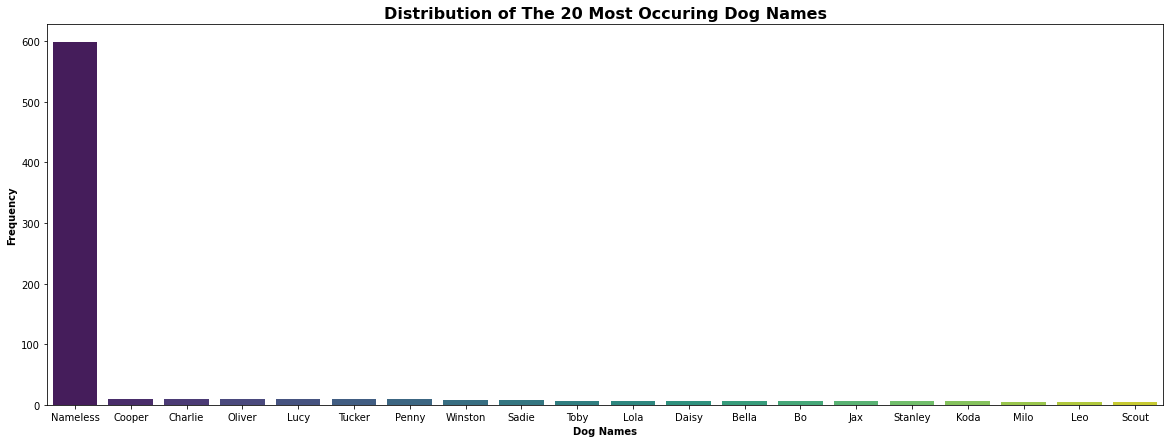

In [246]:
# univariate plot of name
fig, ax = plt.subplots(1, figsize=(20, 7))
g = pd.DataFrame(df_join_clean['name'].value_counts().head(20)).reset_index()
sns.barplot(data=g, x='index', y='name', palette='viridis')
plt.title('Distribution of The 20 Most Occuring Dog Names', fontdict={'fontsize': 16, 'fontweight':'bold'})
plt.xlabel('Dog Names', fontweight= 'bold') 
plt.ylabel('Frequency', fontweight= 'bold')

In [247]:
df_join_clean[['name']].describe().T

,count,unique,top,freq
name,1968,932,Nameless,598


> Most of the dogs featured in the tweets do not have names. Consequently, I will exclude this category

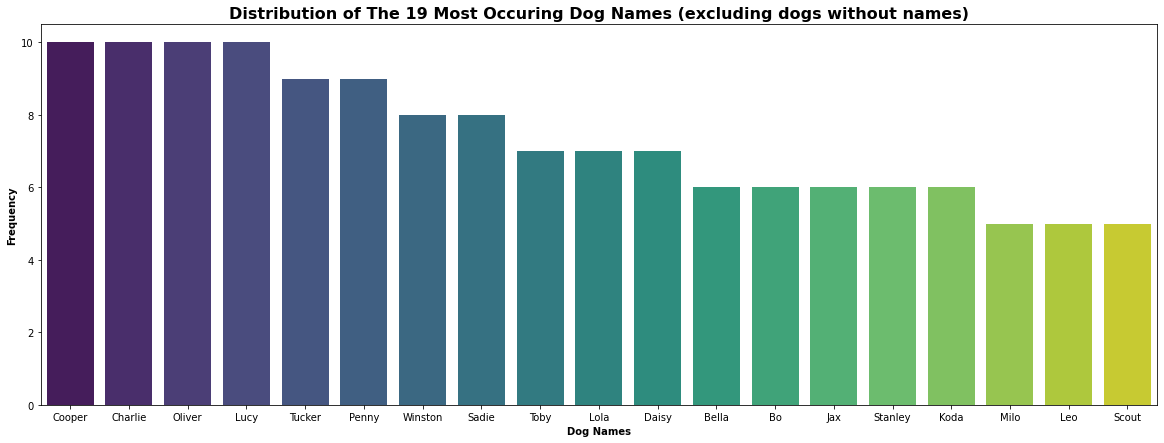

In [248]:
# univariate plot of name (excluding 'nameless' category)
fig, ax = plt.subplots(1, figsize=(20, 7))
g = pd.DataFrame(df_join_clean['name'].value_counts().head(20)).reset_index()[1:]
sns.barplot(data=g, x='index', y='name', palette='viridis')
plt.title('Distribution of The 19 Most Occuring Dog Names (excluding dogs without names)', fontdict={'fontsize': 16, 'fontweight':'bold'})
plt.xlabel('Dog Names', fontweight= 'bold') 
plt.ylabel('Frequency', fontweight= 'bold')
# fig.savefig("dog_names_dist.png", dpi=800)

> Cooper, Charlie, Oliver, and Lucy are quite popular dog names

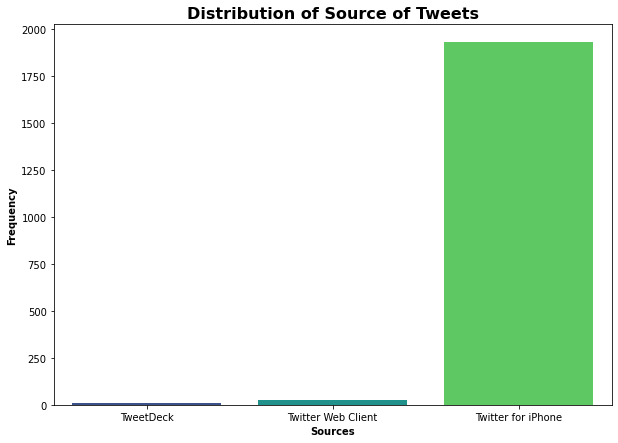

In [249]:
# univariate plot of source
fig, ax = plt.subplots(1, figsize=(10, 7))
sns.countplot(data=df_join_clean, x='source', palette='viridis', saturation=1)
plt.title('Distribution of Source of Tweets', fontdict={'fontsize': 16, 'fontweight':'bold'})
plt.xlabel('Sources', fontweight= 'bold') 
plt.ylabel('Frequency', fontweight= 'bold')
# fig.savefig("source_dist.png", dpi=800)

In [250]:
df_join_clean[['source']].describe().T

,count,unique,top,freq
source,1968,3,Twitter for iPhone,1930


> iPhone users are overwhelmingly represented in this dataset, making up more than 90% of all users

Text(0, 0.5, 'Frequency')

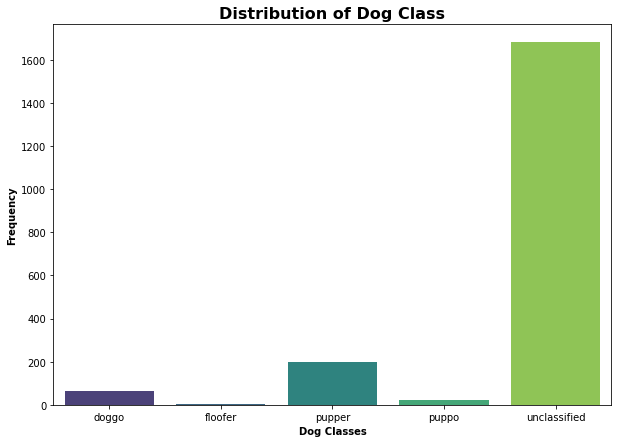

In [251]:
# univariate plot of dog_class
fig, ax = plt.subplots(1, figsize=(10, 7))
sns.countplot(data=df_join_clean, x='dog_class', palette='viridis')
plt.title('Distribution of Dog Class', fontdict={'fontsize': 16, 'fontweight':'bold'})
plt.xlabel('Dog Classes', fontweight= 'bold') 
plt.ylabel('Frequency', fontweight= 'bold')

In [252]:
df_join_clean[['dog_class']].describe().T

,count,unique,top,freq
dog_class,1968,5,unclassified,1680


> Most of the dogs were not classified according to the WeRateDogs classification system

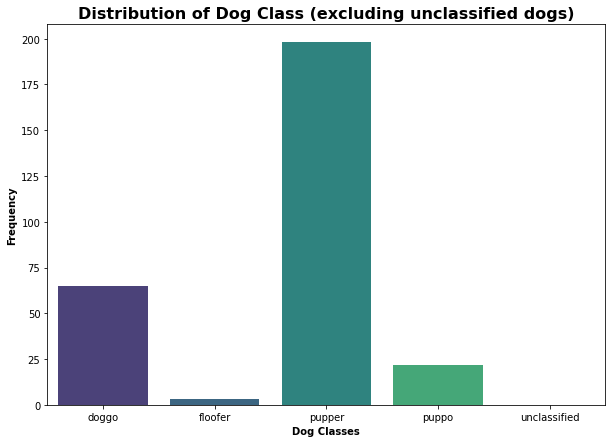

In [253]:
# univariate plot of dog_class without unclassified dogs
g = df_join_clean.query("dog_class != 'unclassified'")

fig, ax = plt.subplots(1, figsize=(10, 7))
sns.countplot(data=g, x='dog_class', palette='viridis')
plt.title('Distribution of Dog Class (excluding unclassified dogs)', fontdict={'fontsize': 16, 'fontweight':'bold'})
plt.xlabel('Dog Classes', fontweight= 'bold') 
plt.ylabel('Frequency', fontweight= 'bold')
# fig.savefig("dog_class_dist.png", dpi=800)

> Excluding the unclassified category, we see clearly that most dogs were rated as "puppers".<br>
Defined according to the Dogtionary, as:<br> "A small doggo. Usually younger.... A doggo that is inexperienced, unfamiliar, or in any wa unprepared for the responsibilities associated with being a doggo"

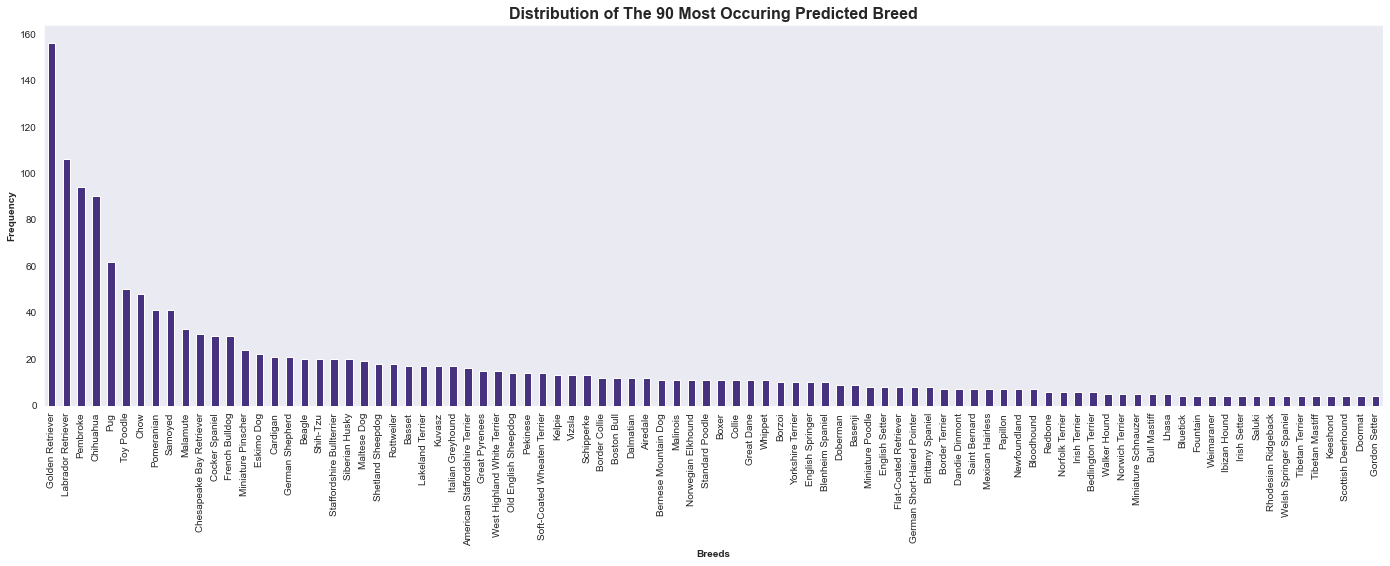

In [254]:
# univariate plot of predicted_breed (top 90)
sns.set_palette('viridis')
sns.set_style('dark')
fig, ax = plt.subplots(1, figsize=(24, 7))
df_join_clean['predicted_breed'].value_counts()[:90].plot.bar(x='predicted_breed', ax=ax,)
plt.title('Distribution of The 90 Most Occuring Predicted Breed', fontdict={'fontsize': 16, 'fontweight':'bold'})
plt.xlabel('Breeds', fontweight= 'bold') 
plt.ylabel('Frequency', fontweight= 'bold')
# fig.savefig("dog_breed_dist.png", dpi=800)

In [255]:
df_join_clean[['predicted_breed']].describe().T

,count,unique,top,freq
predicted_breed,1968,338,Golden Retriever,156


> Golden and Labrador Retrievers are generously represented in this data

### `Continuous Data`
------

In [256]:
# selecting continuous data
df_join_clean.select_dtypes(include=['int64', 'float64']).columns

Index(['img_num', 'retweet_count', 'favorite_count', 'rating_numerator',
       'rating_denominator', 'conf'],
      dtype='object')

<AxesSubplot:title={'center':'Distribution of Number of Images in a Tweet'}, xlabel='Count', ylabel='Count'>

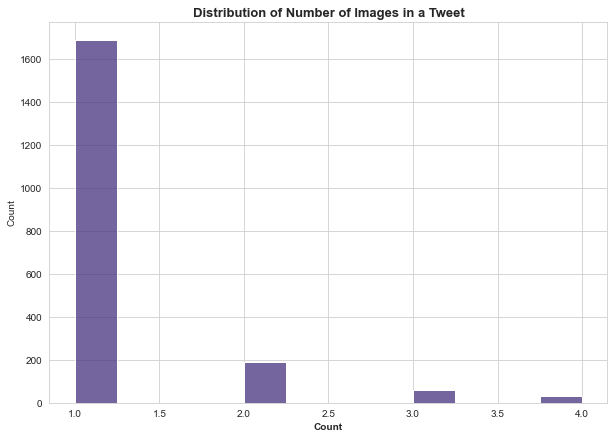

In [257]:
# plotting histogram of num_images
sns.set_style('whitegrid')

fig, ax = plt.subplots(1, figsize=(10, 7))
plt.title('Distribution of Number of Images in a Tweet', fontdict={'fontweight':'bold', 'fontsize':13})
plt.xlabel("Number of Images", fontweight='bold')
plt.xlabel("Count", fontweight='bold')

sns.histplot(data=df_join_clean, x='img_num', palette='viridis', ax=ax)

In [258]:
# summary statistics for 'img_num'
df_join_clean[['img_num']].describe().T

,count,mean,std,min,25%,50%,75%,max
img_num,1968.0,1.202236,0.559391,1.0,1.0,1.0,1.0,4.0


> Just a few tweets contain more than 1 pictures

> 

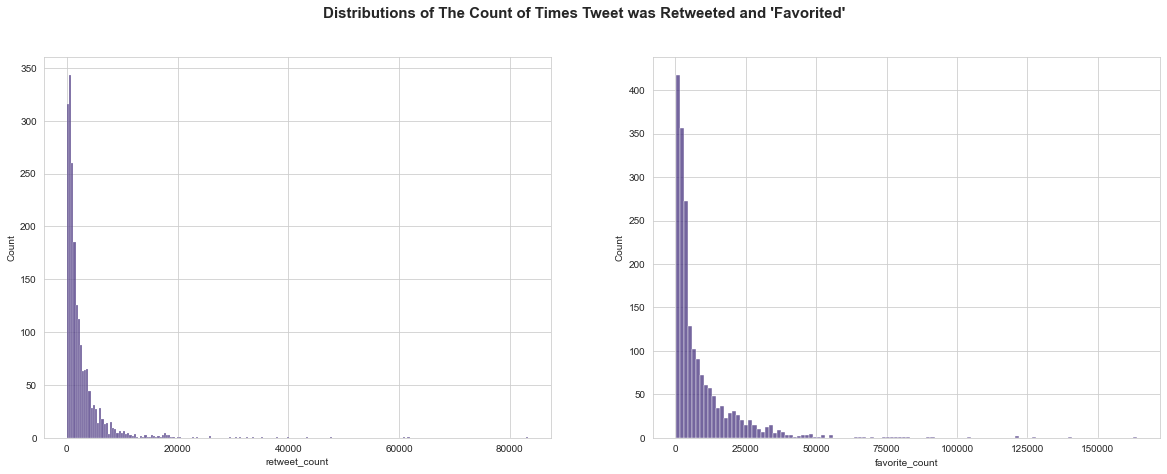

In [259]:
# plotting histogram of retweet_count and favorite_count
sns.set_style('whitegrid')
sns.set_palette('viridis')

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20, 7))
plt.suptitle("Distributions of The Count of Times Tweet was Retweeted and 'Favorited'", fontweight='bold', fontsize=15)
sns.histplot(data=df_join_clean, x='retweet_count', ax=ax1)
sns.histplot(data=df_join_clean, x='favorite_count', ax=ax2)
# fig.savefig("retweet_favorited_dist.png", dpi=800)

In [260]:
# summary statistics for 'retweet_count' and 'favorite_count'
df_join_clean[['retweet_count', 'favorite_count']].describe().T

,count,mean,std,min,25%,50%,75%,max
retweet_count,1968.0,2658.811484,4732.581123,11.0,591.0,1282.0,3037.25,83310.0
favorite_count,1968.0,8761.805894,12828.632914,78.0,1900.5,3952.5,10919.75,163821.0


> The histograms show much skewness to the right indicating that most tweets were not favorited or retweeted much or at all. But very few tweets have retweets in the excess of 80,000

<AxesSubplot:xlabel='rating_denominator', ylabel='Count'>

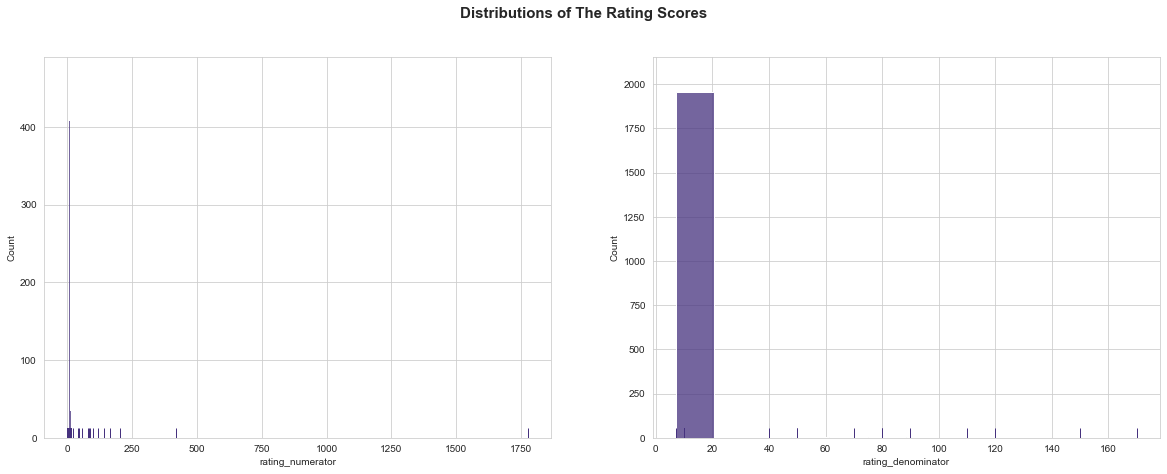

In [261]:
sns.set_style('whitegrid')
sns.set_palette('viridis')

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20, 7))
plt.suptitle("Distributions of The Rating Scores", fontweight='bold', fontsize=15)
sns.histplot(data=df_join_clean, x='rating_numerator', ax=ax1)
sns.rugplot(data=df_join_clean, x='rating_numerator', ax=ax1)

sns.histplot(data=df_join_clean, x='rating_denominator', ax=ax2)
sns.rugplot(data=df_join_clean, x='rating_denominator', ax=ax2)


In [262]:
df_join_clean[['rating_numerator', 'rating_denominator']].describe().T

,count,mean,std,min,25%,50%,75%,max
rating_numerator,1968.0,12.168587,41.629341,0.0,10.0,11.0,12.0,1776.0
rating_denominator,1968.0,10.455793,6.794244,7.0,10.0,10.0,10.0,170.0


> As expected with any form of score data, the ratings histogram is highly right-skewed with medians of 11 & 10 for the numerator and denominator ratings respectively and maximum ratings of 1776 & 170 respectively

Text(0, 0.5, 'Count')

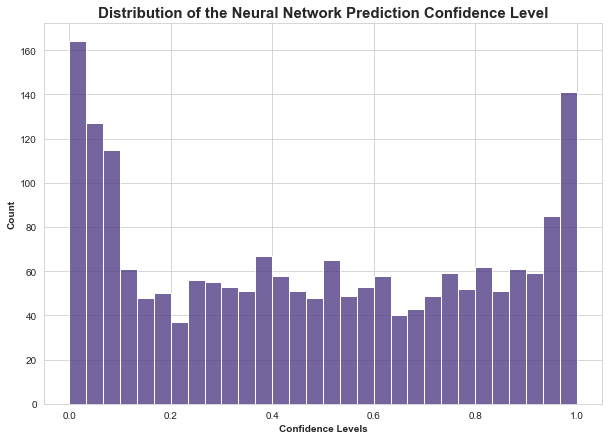

In [263]:
sns.set_style('whitegrid')
sns.set_palette('viridis')

fig, ax = plt.subplots(1, figsize=(10, 7))
plt.title('Distribution of the Neural Network Prediction Confidence Level', fontdict={'fontweight':'bold', 'fontsize':15})

sns.histplot(data=df_join_clean, x='conf', bins=30, ax=ax)
plt.xlabel('Confidence Levels', fontweight='bold')
plt.ylabel('Count', fontweight='bold')


In [264]:
df_join_clean[['conf']].describe().T

,count,mean,std,min,25%,50%,75%,max
conf,1968.0,0.474437,0.328898,1.740170e-10,0.149661,0.460893,0.776849,0.999956


> The distribution of confidence levels is bimodal implying that for most of the tweets, the neural network is either very confident or very uncertain in its predictions of the contents of the pictures

## ***Analyses***
### ***Question 1***: What dog breed was rated the highest?
### ***Code***

I decide to use the numerator of the ratings as a a measure for ratings because even though the ratings have no standard scale, the numerator ratings are a better candidate for this measure than the denominator of the ratings 

In [265]:
# filtering top 20 breeds most occuring breeds
a = df_join_clean['predicted_breed'].value_counts().head(20).index.to_list()
mask = df_join_clean['predicted_breed'].isin(a)

In [266]:
# applying mask
g = df_join_clean[mask]

In [267]:
# grouping by breed and getting the mean of rating_numerator
df = g.groupby('predicted_breed')['rating_numerator'].mean().sort_values(ascending=False).head(20)

In [268]:
# viewing the .groupby result
df.head()

predicted_breed
Chow                  14.166667
Labrador Retriever    13.674528
Golden Retriever      12.266026
Samoyed               11.731707
Eskimo Dog            11.409091
Name: rating_numerator, dtype: float64

### ***Visualization***

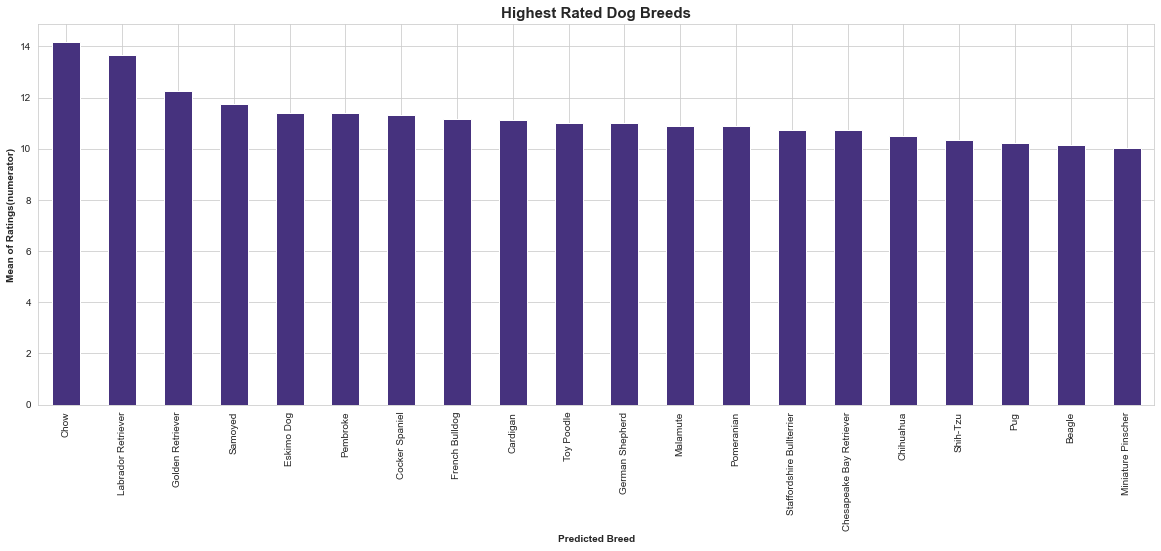

In [269]:
# visualizing
sns.set_style('whitegrid')
sns.set_palette('viridis')

fig, ax = plt.subplots(1, figsize=(20, 7))
ax = df.plot.bar()

plt.title('Highest Rated Dog Breeds', fontsize=15, fontweight='bold')
plt.ylabel('Mean of Ratings(numerator)',fontweight='bold')
plt.xlabel('Predicted Breed', fontweight='bold')
# fig.savefig("breed_ratings_dist.png", dpi=800)

### ***Insight***
The highest rated dog by rating numerator is the Chow with a mean numerator rating of 14.166667

-----
### ***Question 2***: What dog class was retweeted the most?
### ***Code***
### ***Visualizations***

Text(-6.949999999999996, 0.5, 'Count of Retweets')

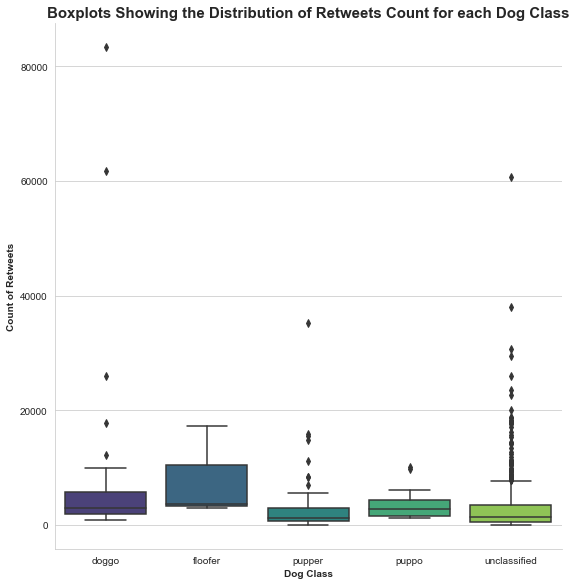

In [270]:
# visualizing distribution

sns.catplot(
x="dog_class", y="retweet_count", data=g, kind='box', palette='viridis', height=8
)
plt.title('Boxplots Showing the Distribution of Retweets Count for each Dog Class', fontweight='bold', fontsize=15)
plt.xlabel('Dog Class', fontweight='bold')
plt.ylabel('Count of Retweets', fontweight='bold')

> Looking at the boxplots alone, it seems floofers are retweeted more often than the others...

Text(0, 0.5, 'Count of Retweets')

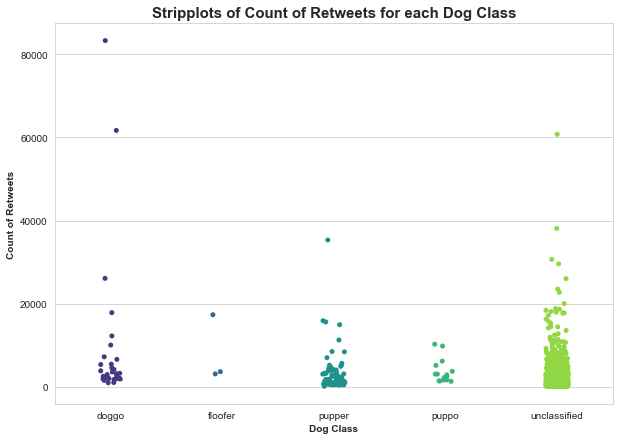

In [271]:
# visualizing scatterplots
fig, ax = plt.subplots( figsize=(10,7))
sns.stripplot(
x="dog_class", y="retweet_count", data=g, palette='viridis', ax=ax
)
plt.title('Stripplots of Count of Retweets for each Dog Class', fontweight='bold', fontsize=15)
plt.xlabel('Dog Class', fontweight='bold')
plt.ylabel('Count of Retweets', fontweight='bold')

In [272]:
# grouping by dog class and taking aggregations of retweet count
df_join_clean.groupby('dog_class')['retweet_count'].agg(['mean','median', 'count'])

,mean,median,count
dog_class,,,
doggo,6273.923077,2913.0,65
floofer,8002.000000,3611.0,3
pupper,2269.353535,1143.5,198
puppo,6899.681818,2940.5,22
unclassified,2499.764881,1242.5,1680


> However, the stripplot and table show the clearer picture: the four dog classes have very different counts

### ***Insights***

 - The four dog classes have very different counts so its quite difficult to make a comparison across them
 - I therefore cannot conclude conclusively that there are any differences in the retweet counts among the dog classes


-----
### ***Question 3***: What trends are there in tweet activity over time?
### ***Code***

In [273]:
# Calculating how many tweets from 2015 are in this dataframe
criteria = df_join_clean['timestamp'].dt.year == 2015
min =df_join_clean.loc[criteria, 'timestamp'].dt.dayofyear.min()
max = df_join_clean.loc[criteria, 'timestamp'].dt.dayofyear.max()
no_of_days = max - min
print(f"There were {no_of_days} days of tweet activity in 2015")

There were 46 days of tweet activity in 2015


In [274]:
# Calculating how many tweets from 2016 are in this dataframe
criteria = df_join_clean['timestamp'].dt.year == 2016
min =df_join_clean.loc[criteria, 'timestamp'].dt.dayofyear.min()
max = df_join_clean.loc[criteria, 'timestamp'].dt.dayofyear.max()
no_of_days = max - min
print(f"There were {no_of_days} days of tweet activity in 2016")

There were 365 days of tweet activity in 2016


In [275]:
# Calculating how many tweets from 2017 are in this dataframe
criteria = df_join_clean['timestamp'].dt.year == 2017
min =df_join_clean.loc[criteria, 'timestamp'].dt.dayofyear.min()
max = df_join_clean.loc[criteria, 'timestamp'].dt.dayofyear.max()
no_of_days = max - min
print(f"There were {no_of_days} days of tweet activity in 2017")

There were 212 days of tweet activity in 2017


### ***Visualizations***

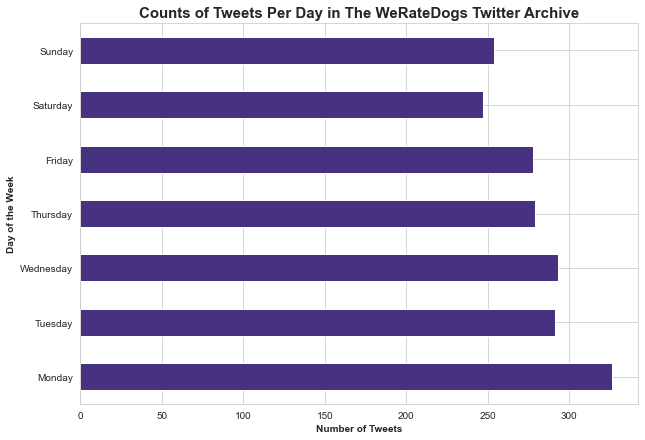

In [276]:
# Visualising count of tweet activity
sns.set_palette('viridis')
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday',
'Friday', 'Saturday', 'Sunday']
title = 'Counts of Tweets Per Day in The WeRateDogs Twitter Archive'
fig, ax = plt.subplots(figsize=(10, 7))
(df_join_clean
['timestamp']
.dt.day_name() 
.value_counts()
.reindex(days)
.plot.barh(ax=ax)
)
plt.title(title,fontweight='bold', fontsize=15)
plt.xlabel("Number of Tweets",fontweight='bold')
plt.ylabel("Day of the Week",fontweight='bold')
# fig.savefig("tweets_per_day.png", dpi=800)

> Most WeRateDog users tweet on Mondays

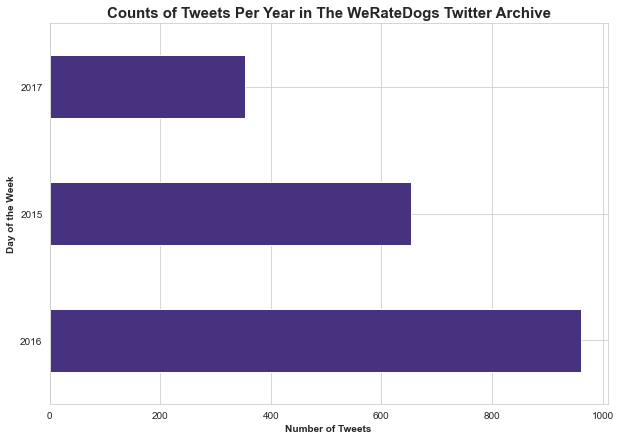

In [277]:
# Visualising count of tweet activity per year
sns.set_palette('viridis')
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday',
'Friday', 'Saturday', 'Sunday']
title = 'Counts of Tweets Per Year in The WeRateDogs Twitter Archive'
fig, ax = plt.subplots(figsize=(10, 7))
(df_join_clean
['timestamp']
.dt.year 
.value_counts()
.plot.barh(ax=ax)
)
plt.title(title,fontweight='bold', fontsize=15)
plt.xlabel("Number of Tweets",fontweight='bold')
plt.ylabel("Day of the Week",fontweight='bold')
# fig.savefig("tweets_per_year.png", dpi=800)

> Most tweets in the dataset was from 2016.

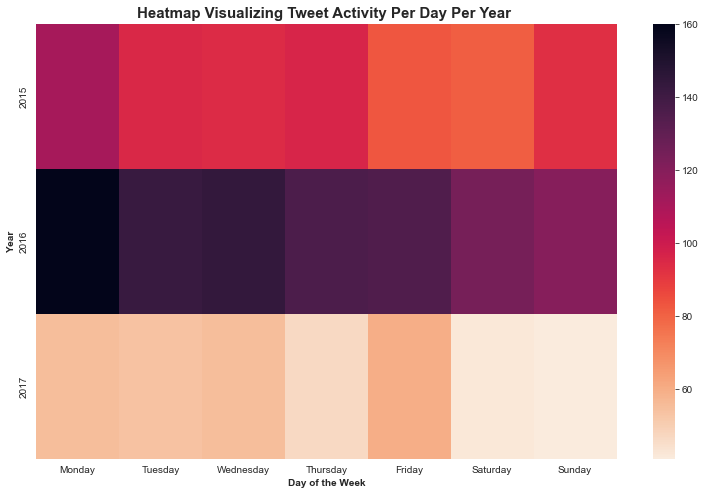

In [278]:
# Heatmap of tweet activity 
fig, ax = plt.subplots(figsize=(13, 8))
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday',
'Friday', 'Saturday', 'Sunday']
table = (df_join_clean
.groupby([df_join_clean['timestamp'].dt.year.rename('year'),
df_join_clean['timestamp'].dt.day_name().
rename('day')])
.size()
.unstack('day')
.reindex(columns=days)
)
sns.heatmap(table,cmap='rocket_r', ax=ax)
title='Heatmap Visualizing Tweet Activity Per Day Per Year '
plt.title(title,fontweight='bold', fontsize=15)
plt.xlabel("Day of the Week",fontweight='bold')
plt.ylabel("Year",fontweight='bold')
# fig.savefig("heatmap_1.png", dpi=800)

In [279]:
df_join_clean.groupby([df_join_clean['timestamp'].dt.year.rename('year'),df_join_clean['timestamp'].dt.day_name().rename('day')]).size().unstack('day').reindex(columns=days)

day,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
year,,,,,,,
2015,111,95,94,96,83,81,93
2016,160,142,144,136,135,124,120
2017,55,54,55,47,60,42,41


> In all three years, WeRateDogs users tweeted mostly on Mondays. In 2015, Saturday has the lowest tweet activity

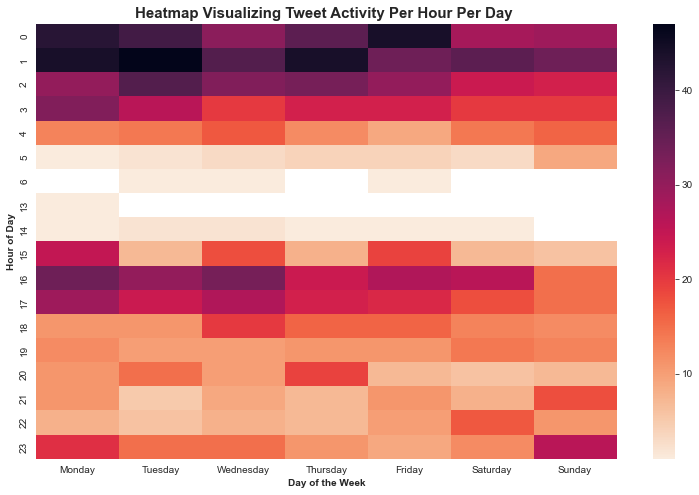

In [280]:
# Heatmap of tweet activity 
fig, ax = plt.subplots(figsize=(13, 8))
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday',
'Friday', 'Saturday', 'Sunday']
table = (df_join_clean
.groupby([df_join_clean['timestamp'].dt.hour.rename('hour'),
df_join_clean['timestamp'].dt.day_name().
rename('day')])
.size()
.unstack('day')
.reindex(columns=days)
)
sns.heatmap(table,cmap='rocket_r', ax=ax)
title='Heatmap Visualizing Tweet Activity Per Hour Per Day '
plt.title(title,fontweight='bold', fontsize=15)
plt.xlabel("Day of the Week",fontweight='bold')
plt.ylabel("Hour of Day",fontweight='bold')
# fig.savefig("heatmap_2.png", dpi=800)

> This heatmap tells an interesting story. First, a lot of tweets are tweeted in the wee-hours of the morning, from 12 midnight till 4 a.m. From 5 a.m., onwards till 1 p.m. tweet activity declined sharply, most likely due to users being busy at work. From 3 p.m. to 5 p.m, tweet activity picks up again. For much of the evenings and night, tweet activity remains moderate, except on some days like Mondays and Sundays, where tweet activity is fairly high at 11 p.m. Sunday being the last day of the weekend so perhaps tweeters try and spend the most of their remaining weekend hours rating dogs. And perhaps the high activity on Mondat midnight can be explained by tweetrs trying to down the Monday blues.

> This is all speculation of course and I do not state affirmatively that this is actually the case.

### ***Insights***

 -  Most WeRateDog users tweet on Mondays
 - Most tweets in the dataset was from 2016.
 - In all three years, WeRateDogs users tweeted mostly on Mondays. In 2015, Saturday has the lowest tweet activity
 - Tweets activity is highest in the the wee-hours of the morning, declining by dawn and picking up again in the late afternoon and throughout the night

<a id='conclusion'></a>
# `Conclusion`

After wrangling and merging data about WeRateDogs tweet activity from 3 sources, I posed and answered the following questions:
> **What dog breed gets rated the highest?** -> The Chow with a mean numerator rating of 14.166667<br>
>
> **What dog class gets retweeted the most?** ->  Inconclusive in this case, since the four dog classes have very different counts<br>
>
> **What trends are there in tweet activity in over time?** -> In all three years, WeRateDogs users tweeted mostly on Mondays. Also, a lot of tweets are tweeted in the early hours of the morning, declining by dawn and picking up again in the late afternoon and throughout the night

I also discovered that:
 - Golden and Labrador Retrievers are generously represented in this data
 - Excluding the unclassified category, most dogs were rated as "puppers"
 - iPhone users are overwhelmingly represented in this dataset, making up more than 90% of all users
 - Cooper, Charlie, Oliver, and Lucy are quite popular dog names
    

### Limitations
This following should be noted while deriving insights from this analysis:
 - Since statistical inference was not performed, these findings cannot be said to apply to the entire population of WeRateDogs users
 - While correcting some incorrect ratings, I made arbitrary decisions like choosing to use the average of the numerator ratings wherever they are two dogs present in the picture 
 - Further analysis can be done, especially time series analysis to shed more light on tweet activity

<a id='report'><a>
# `Report`

The report can be viewed __[here](https://drive.google.com/file/d/1r_GPMLMiH_ilXPbJQn8GBASq5JjVaGBN/view?usp=sharing)__